# Progetto Data-Intensive: Predizione Indice di Borsa

**Progetto di Applicazioni Data Intensive**  

Gruppo:
- Mattia Vincenzi
    - matricola: 792970
    - mail: ´mattia.vincenzi2@studio.unibo.it´
- Rei Beshiri
    - matricola: 789973
    - mail: ´rei.beshiri@studio.unibo.it´

# Obiettivo: Predizione Indice di Borsa

- Ci è stato commissionato da un'impresa di gestione fondi, lo sviluppo di un applicativo per il supporto decisionale riguardo gli investimenti da effettuare in borsa. 

- Gli indici azionari sono la sintesi del valore del paniere di titoli azionari che rappresentano.
    - Ad esempio: S&P 500, Nasdaq, DJIA ...  
    
- I movimenti dell'indice sono una buona approssimazione del variare nel tempo della valorizzazione dei titoli compresi nel portafoglio. Esistono differenti metodologie di calcolo degli indici, a seconda della ponderazione che viene attribuita alle azioni del paniere.

- L'analisi si basa sui principali indici.

- Il nostro obiettivo è quello di creare un modello in grado di predire l'andamento di un indice nel giorno successivo, al fine di massimizzare il guadagno di un possibile investimento.

# Nasdaq

- __NASDAQ (National Association of Securities Dealers Automated Quotation)__ è il primo esempio al mondo di mercato borsistico elettronico, cioè di un mercato costituito da una rete di computer.

- Il __NASDAQ__ è, essenzialmente, l'indice dei principali titoli tecnologici della borsa americana. 

- Vi sono anche quotate compagnie di molteplici settori, tra cui quelle informatiche come Microsoft, Cisco Systems, IBM, Apple, Google, Yahoo, Facebook e Amazon.

# Raccolta Dati e Analisi Esplorativa

- I dati per effettuare l'analisi sono reperibili da Yahoo Finance (https://finance.yahoo.com). 

- Per scaricarli ed utilizzarli in maniera agevole abbiamo utilizzato la libreria Python yfinance, una evoluzione di fix-yahoo-finance (https://github.com/ranaroussi/yfinance).

- Per prima cosa sarà quindi necessario installare la libreria da terminale con il comando:
    - pip install yfinance --upgrade --no-cache-dir


- Una volta seguiti i passi precedenti sarà quindi possibile effettuare l'import della libreria.

In [201]:
import yfinance as yf

- Abbiamo scelto l'utilizzo di tale libreria in quanto consente di scaricare i dati storici del mercato in maniera semplice ed immediata.

- Il comando sotto riportato consente di specificare:
    - ISIN (International Security Identification Number): codice identificativo a livello internazionale per identificare indici, azioni ecc...
    - La data di inizio.
    - La data di fine.
    
- Nel nostro caso abbiamo scaricato tutti i dati relativi all'ultimo ventennio.

In [202]:
nasdaq = yf.download("^IXIC", start="1999-01-01", end="2019-05-27") #^IXIC

[*********************100%***********************]  1 of 1 downloaded


- La libreria yfinance ci restituisce i dati sotto forma di DataFrame Pandas, senza bisogno di ulteiori conversioni.

In [203]:
import pandas as pd
import numpy as np

In [204]:
nasdaq.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-12-31,2169.38,2200.63,2165.74,2192.69,2192.69,886630000
1999-01-04,2207.54,2233.57,2192.68,2208.05,2208.05,936660000
1999-01-05,2207.75,2251.77,2206.49,2251.27,2251.27,948350000
1999-01-06,2286.13,2320.95,2286.13,2320.86,2320.86,1252650000
1999-01-07,2293.27,2333.70,2284.24,2326.09,2326.09,1200900000
1999-01-08,2363.80,2369.55,2314.95,2344.41,2344.41,1286690000
1999-01-11,2373.97,2384.72,2348.24,2384.59,2384.59,1140930000
1999-01-12,2395.90,2396.30,2320.21,2320.75,2320.75,1107300000
1999-01-13,2222.28,2353.33,2205.69,2316.81,2316.81,1195470000


- Visualizziamo la dimensione della nostra matrice.

In [205]:
nasdaq.shape

(5132, 6)

- Le Features presenti nel nostro DataSet (composto da 5000 record) sono:
    - `Date`: data utilizzata come indice del DataFrame. 
    - `Open`: indica il valore del titolo all'apertura del mercato (Dollari).
    - `Close`: indica il valore alla chiusura del mercato.
    - `High`: indica il valore massimo raggiunto dal titolo nell'arco della giornata.
    - `Low`: indica il valore minimo raggiunto dal titolo nell'arco della giornata.
    - `Adj Close`: è una versione corretta del prezzo di chiusura. 
    - `Volume`: indica il numero totale di titoli scambiati durante quel giorno. 

- Con i dati presenti nel DataFrame possiamo visualizzare l'andamento del prezzo di apertura nel tempo.

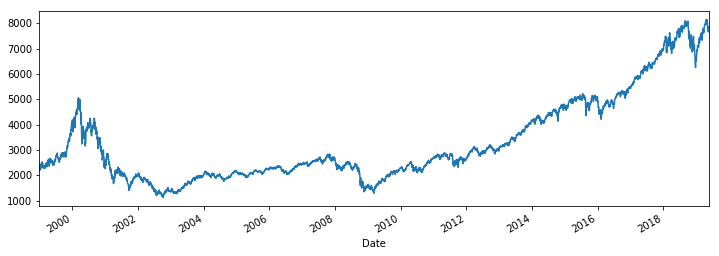

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

nasdaq["Open"].plot(figsize=(12, 4))

- Possiamo vedere anche l'andamento delle transazioni nel tempo. 
    - `Nota`: Scala logaritmica sulle y.

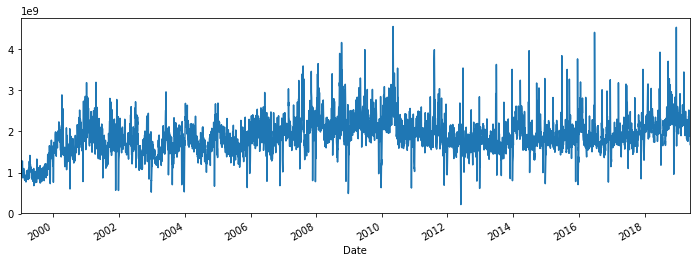

In [207]:
nasdaq["Volume"].plot(figsize=(12, 4))

- Trattandosi di informazioni numeriche possiamo otterne informaizioni utili sulla distribuzione delle `features`.

In [208]:
nasdaq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5.132000e+03
mean,3293.728396,3316.067013,3267.747901,3293.181647,3293.181647,1.880664e+09
std,1697.520915,1704.006922,1690.042113,1697.807087,1697.807087,4.392974e+08
min,1116.760000,1135.890000,1108.490000,1114.110000,1114.110000,2.214300e+08
25%,2091.650000,2105.365000,2075.575000,2090.185000,2090.185000,1.646770e+09
50%,2598.345000,2616.195000,2574.205000,2597.140000,2597.140000,1.868835e+09
75%,4324.832500,4340.745000,4287.660000,4321.492500,4321.492500,2.106108e+09
max,8150.850000,8176.080000,8136.410000,8164.000000,8164.000000,4.553600e+09


# Analisi dei dati e selezione delle features



- Fortunatamente essendo Yahoo Finance ben organizzato non presenta dati mancanti o NaN all'interno del DataSet.

- Dopo aver analizzato la distribuzione e le caratteristiche dei dati, abbiamo notato che la features `Adj Close` è identica a `Close`. Per questo motivo possiamo eliminarla in quanto dati duplicati non sono utili nella realizzazione di un modello di classificazione.

- Dai valori $O_d$ di apertura e $C_d$ di chiusura di ogni giorno $d$, possiamo definire la variazione dell'indice  (ROI) ($\delta_d$) come segue:
$$ \delta_d=\frac{C_d-O_d}{O_d} $$

- Consideriamo il capitale investito come il prezzo di una azione in apertura.
- Se positivo abbiamo che il prezzo di chiusura > del prezzo di apertura
- Se negativo contrario

- Abbiamo chiamato questa feature __ROI__ in quanto corrisponde esattamente alla redditività del capitale investito sul singolo titolo.

In [209]:
nasdaq["ROI"] = 100*(nasdaq["Close"] - nasdaq["Open"]) / nasdaq["Open"] # Guadagno percentuale.

In [210]:
nasdaq.tail(10)

,Open,High,Low,Close,Adj Close,Volume,ROI
Date,,,,,,,
2019-05-13,7720.07,7760.83,7627.22,7647.02,7647.02,2478860000,-0.946235
2019-05-14,7689.66,7776.20,7665.30,7734.49,7734.49,2084850000,0.582991
2019-05-15,7682.80,7838.72,7682.24,7822.15,7822.15,2001530000,1.813792
2019-05-16,7832.58,7946.23,7826.67,7898.05,7898.05,2163120000,0.835868
2019-05-17,7829.03,7918.71,7810.35,7816.28,7816.28,2134120000,-0.162855
2019-05-20,7714.06,7747.27,7678.35,7702.38,7702.38,2122410000,-0.151412
2019-05-21,7765.57,7804.44,7752.92,7785.72,7785.72,1993210000,0.259479
2019-05-22,7749.80,7786.33,7738.35,7750.84,7750.84,1881830000,0.013420
2019-05-23,7660.72,7665.15,7585.32,7628.28,7628.28,2243420000,-0.423459


- Possiamo plottare la variabile di interesse che vogliamo predire.

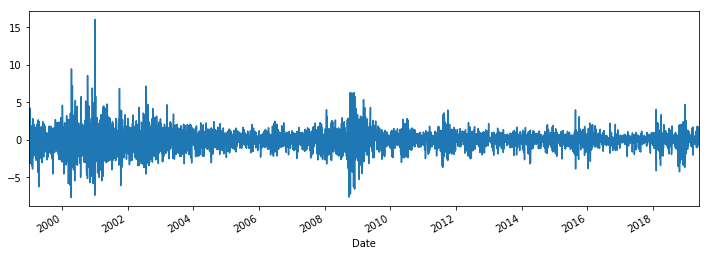

In [211]:
nasdaq["ROI"].plot(figsize=(12, 4))

- Perchè abbiamo aggiunto questa features ? 
    - Perchè è di nostro interesse valutare se l'indice durante la giornata crescerà o calerà. Questo per poter consigliare la corretta azione di Trading da svolgere all'apertura del mercato:
        - Vendere nel caso in cui il tittolo durante la giornata cali.
        - Comprare nel caso in cui il titolo salga.

- Per poter effettuare una qualsiasi predizione sul giorno corrente è necessario basarsi anche sui dati dei giorni precedenti, che devono essere noti all'apertura del giorno da predire.
- Considerando che la settimana in borsa è di 5 giorni (da Lunedì a Venerdì) dobbiamo aggiungere tante features quanti sono i giorni precedenti che vogliamo considerare (nel nostro caso 5).

- Le features che abbiamo deciso di considerare anche per i giorni precedenti sono:
    - `ROI`: la consideriamo dei 5 giorni precedenti, in quanto riflette la redditività del capitale investito.
    - `Open` e `Close`: abbiamo deciso di includerle entrambe in quanto il ROI può non catturare grandi variazioni da un prezzo di chiusura del giorno precedente al prezzo di apertura del giorno successivo, non dovendo essere per forza identici.
    - `Volume`: il volume delle transazioni del giorno predente.
    
    
- Esempio: Se il mercato il giorno n apre e chiude allo stesso prezzo es. apertura: 50, chiusura: 50, il giorno n+1 (il successivo) può avere una drastica variazione in apertura (positiva o negativa) a fronte di possibili eventi (es. altri mercati, un attentato, una buona notizia e così via), portando quindi un eventuale apertura a 10 ed una possibile chiusura a 10; tale cambiamento non viene catturato dal solo ROI.

In [212]:
for i in range(1, 6):
    nasdaq["ROILag{}".format(i)] = nasdaq["ROI"].shift(i)

In [213]:
nasdaq.head(10)

,Open,High,Low,Close,Adj Close,Volume,ROI,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5
Date,,,,,,,,,,,,
1998-12-31,2169.38,2200.63,2165.74,2192.69,2192.69,886630000,1.074501,NaN,NaN,NaN,NaN,NaN
1999-01-04,2207.54,2233.57,2192.68,2208.05,2208.05,936660000,0.023103,1.074501,NaN,NaN,NaN,NaN
1999-01-05,2207.75,2251.77,2206.49,2251.27,2251.27,948350000,1.971238,0.023103,1.074501,NaN,NaN,NaN
1999-01-06,2286.13,2320.95,2286.13,2320.86,2320.86,1252650000,1.519161,1.971238,0.023103,1.074501,NaN,NaN
1999-01-07,2293.27,2333.70,2284.24,2326.09,2326.09,1200900000,1.431144,1.519161,1.971238,0.023103,1.074501,NaN
1999-01-08,2363.80,2369.55,2314.95,2344.41,2344.41,1286690000,-0.820289,1.431144,1.519161,1.971238,0.023103,1.074501
1999-01-11,2373.97,2384.72,2348.24,2384.59,2384.59,1140930000,0.447352,-0.820289,1.431144,1.519161,1.971238,0.023103
1999-01-12,2395.90,2396.30,2320.21,2320.75,2320.75,1107300000,-3.136608,0.447352,-0.820289,1.431144,1.519161,1.971238
1999-01-13,2222.28,2353.33,2205.69,2316.81,2316.81,1195470000,4.253739,-3.136608,0.447352,-0.820289,1.431144,1.519161


- Per quanto riguarda il Volume delle trasnazioni abbiamo deciso di considerare solo quello del giorno precedente.

In [214]:
nasdaq["VolumeLag1"] = nasdaq["Volume"].shift(1)

In [215]:
nasdaq.head(10)

,Open,High,Low,Close,Adj Close,Volume,ROI,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,VolumeLag1
Date,,,,,,,,,,,,,
1998-12-31,2169.38,2200.63,2165.74,2192.69,2192.69,886630000,1.074501,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,2207.54,2233.57,2192.68,2208.05,2208.05,936660000,0.023103,1.074501,NaN,NaN,NaN,NaN,8.866300e+08
1999-01-05,2207.75,2251.77,2206.49,2251.27,2251.27,948350000,1.971238,0.023103,1.074501,NaN,NaN,NaN,9.366600e+08
1999-01-06,2286.13,2320.95,2286.13,2320.86,2320.86,1252650000,1.519161,1.971238,0.023103,1.074501,NaN,NaN,9.483500e+08
1999-01-07,2293.27,2333.70,2284.24,2326.09,2326.09,1200900000,1.431144,1.519161,1.971238,0.023103,1.074501,NaN,1.252650e+09
1999-01-08,2363.80,2369.55,2314.95,2344.41,2344.41,1286690000,-0.820289,1.431144,1.519161,1.971238,0.023103,1.074501,1.200900e+09
1999-01-11,2373.97,2384.72,2348.24,2384.59,2384.59,1140930000,0.447352,-0.820289,1.431144,1.519161,1.971238,0.023103,1.286690e+09
1999-01-12,2395.90,2396.30,2320.21,2320.75,2320.75,1107300000,-3.136608,0.447352,-0.820289,1.431144,1.519161,1.971238,1.140930e+09
1999-01-13,2222.28,2353.33,2205.69,2316.81,2316.81,1195470000,4.253739,-3.136608,0.447352,-0.820289,1.431144,1.519161,1.107300e+09


- Come spiegato precedentemente consideriamo in aggiunta l'Open e Close dei 5 giorni passati.

In [216]:
for i in range(1, 6):
    nasdaq["OpenLag{}".format(i)] = nasdaq["Open"].shift(i)

In [217]:
for i in range(1, 6):
    nasdaq["CloseLag{}".format(i)] = nasdaq["Close"].shift(i)

In [218]:
for i in range(1, 6):
    nasdaq["HighLag{}".format(i)] = nasdaq["High"].shift(i)

In [219]:
for i in range(1, 6):
    nasdaq["LowLag{}".format(i)] = nasdaq["Low"].shift(i)

In [220]:
nasdaq.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ROI', 'ROILag1',
       'ROILag2', 'ROILag3', 'ROILag4', 'ROILag5', 'VolumeLag1', 'OpenLag1',
       'OpenLag2', 'OpenLag3', 'OpenLag4', 'OpenLag5', 'CloseLag1',
       'CloseLag2', 'CloseLag3', 'CloseLag4', 'CloseLag5', 'HighLag1',
       'HighLag2', 'HighLag3', 'HighLag4', 'HighLag5', 'LowLag1', 'LowLag2',
       'LowLag3', 'LowLag4', 'LowLag5'],
      dtype='object')

- Ora avendo considerato tutte le features di nostro interesse estraiamo quelle che riteniamo importanti per le nostre predizioni.

In [221]:
features = ["Open"] + ["VolumeLag1"] \
                    + ["ROILag{}".format(i) for i in range(1,6)] \
                    + ["OpenLag{}".format(i) for i in range(1,6)] \
                    + ["CloseLag{}".format(i) for i in range(1,6)] \
                    + ["HighLag{}".format(i) for i in range(1,6)] \
                    + ["LowLag{}".format(i) for i in range(1,6)]

In [222]:
features

['Open',
 'VolumeLag1',
 'ROILag1',
 'ROILag2',
 'ROILag3',
 'ROILag4',
 'ROILag5',
 'OpenLag1',
 'OpenLag2',
 'OpenLag3',
 'OpenLag4',
 'OpenLag5',
 'CloseLag1',
 'CloseLag2',
 'CloseLag3',
 'CloseLag4',
 'CloseLag5',
 'HighLag1',
 'HighLag2',
 'HighLag3',
 'HighLag4',
 'HighLag5',
 'LowLag1',
 'LowLag2',
 'LowLag3',
 'LowLag4',
 'LowLag5']

- Chiamiamo X l'insieme delle osservazioni contenenti i record di nostro interesse.

In [223]:
X = nasdaq[features].copy()

In [224]:
X.head(10)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,2169.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,2207.54,8.866300e+08,1.074501,NaN,NaN,NaN,NaN,2169.38,NaN,NaN,...,2200.63,NaN,NaN,NaN,NaN,2165.74,NaN,NaN,NaN,NaN
1999-01-05,2207.75,9.366600e+08,0.023103,1.074501,NaN,NaN,NaN,2207.54,2169.38,NaN,...,2233.57,2200.63,NaN,NaN,NaN,2192.68,2165.74,NaN,NaN,NaN
1999-01-06,2286.13,9.483500e+08,1.971238,0.023103,1.074501,NaN,NaN,2207.75,2207.54,2169.38,...,2251.77,2233.57,2200.63,NaN,NaN,2206.49,2192.68,2165.74,NaN,NaN
1999-01-07,2293.27,1.252650e+09,1.519161,1.971238,0.023103,1.074501,NaN,2286.13,2207.75,2207.54,...,2320.95,2251.77,2233.57,2200.63,NaN,2286.13,2206.49,2192.68,2165.74,NaN
1999-01-08,2363.80,1.200900e+09,1.431144,1.519161,1.971238,0.023103,1.074501,2293.27,2286.13,2207.75,...,2333.70,2320.95,2251.77,2233.57,2200.63,2284.24,2286.13,2206.49,2192.68,2165.74
1999-01-11,2373.97,1.286690e+09,-0.820289,1.431144,1.519161,1.971238,0.023103,2363.80,2293.27,2286.13,...,2369.55,2333.70,2320.95,2251.77,2233.57,2314.95,2284.24,2286.13,2206.49,2192.68
1999-01-12,2395.90,1.140930e+09,0.447352,-0.820289,1.431144,1.519161,1.971238,2373.97,2363.80,2293.27,...,2384.72,2369.55,2333.70,2320.95,2251.77,2348.24,2314.95,2284.24,2286.13,2206.49
1999-01-13,2222.28,1.107300e+09,-3.136608,0.447352,-0.820289,1.431144,1.519161,2395.90,2373.97,2363.80,...,2396.30,2384.72,2369.55,2333.70,2320.95,2320.21,2348.24,2314.95,2284.24,2286.13


- Come possiamo vedere dal DataFrame sono presenti alcuni valori NaN a causa dello shift. Abbiamo infatti voluto considerare i dati dei 5 giorni lavorativi precedenti, dati che non sono disponibili per i primi 5 giorni del DataSet.

- Essendo pochi i dati NaN rispetto al totale, possiamo semplicemnte dropparli (meno dello 0.1%).

In [225]:
5 / X.shape[0] * 100

0.09742790335151988

In [226]:
X.dropna(inplace=True)

In [227]:
X.head(5)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-08,2363.80,1.200900e+09,1.431144,1.519161,1.971238,0.023103,1.074501,2293.27,2286.13,2207.75,...,2333.70,2320.95,2251.77,2233.57,2200.63,2284.24,2286.13,2206.49,2192.68,2165.74
1999-01-11,2373.97,1.286690e+09,-0.820289,1.431144,1.519161,1.971238,0.023103,2363.80,2293.27,2286.13,...,2369.55,2333.70,2320.95,2251.77,2233.57,2314.95,2284.24,2286.13,2206.49,2192.68
1999-01-12,2395.90,1.140930e+09,0.447352,-0.820289,1.431144,1.519161,1.971238,2373.97,2363.80,2293.27,...,2384.72,2369.55,2333.70,2320.95,2251.77,2348.24,2314.95,2284.24,2286.13,2206.49
1999-01-13,2222.28,1.107300e+09,-3.136608,0.447352,-0.820289,1.431144,1.519161,2395.90,2373.97,2363.80,...,2396.30,2384.72,2369.55,2333.70,2320.95,2320.21,2348.24,2314.95,2284.24,2286.13
1999-01-14,2337.31,1.195470e+09,4.253739,-3.136608,0.447352,-0.820289,1.431144,2222.28,2395.90,2373.97,...,2353.33,2396.30,2384.72,2369.55,2333.70,2205.69,2320.21,2348.24,2314.95,2284.24


- Ora abbiamo predisposto il DataSet per poter effettuare le nostre predizioni. Abbiamo evitato volutamente la definizione della variabile dipendente (y), in quanto verrà definita successivamente in base al tipo di analisi.

# Predizione mediante Classificazione



- In questo paragrafo, basandoci sui dati predisposti precedentemente abbiamo deciso di predire l'andamento di mercato alla chiusura della giornata in esame ('Up' or 'Down').

- In questo caso la variabile dipendente (y) diventa il ROI. 
- Dovendo effettuare un compito di classificazione bianaria è necessario trasformare la colonna da predire in etichette.

In [228]:
y = nasdaq[5:]["ROI"].copy()

In [229]:
y.head(5)

Date
1999-01-08   -0.820289
1999-01-11    0.447352
1999-01-12   -3.136608
1999-01-13    4.253739
1999-01-14   -2.588018
Name: ROI, dtype: float64

- Dato che dal DataFrame X abbiamo scartato le prime 5 righe contenenti valori NaN, è necessario quindi eseguire la stessa operazione sulle y.

- Eseguiamo l'etichettamento.
- Creiamo una Series Pandas in cui sostituiamo i valori:
    - Negativi con l'etichetta __Down__. 
    - Positivi con l'etichetta __Up__.

In [230]:
y = pd.Series(np.where(y >= 0, "Up", "Down"), index=y.index)

In [231]:
y.head(3)

Date
1999-01-08    Down
1999-01-11      Up
1999-01-12    Down
dtype: object

- È interessante controllare la distribuzione delle etichette una volta assegnate, essendo la variabile y categorica.

In [232]:
y.value_counts()

Up      2724
Down    2403
dtype: int64

## Divisione Training Set e Validation Set

- È necessario dividere i dati in 3 insiemi disgiunti:
    - __Training Set__: insieme utilizzato per l'addestramento del modello.
    - __Validation Set__: insieme utilizzato per il tuning degli iperparametri.
    - __Test Set__: utilizzato come insieme per stabilire l'accuratezza del modello a regime, su dati ignoti.
- Dato che il procedimento che eseguiamo è un procedimento a spirale, ovvero dove possiamo addestrare modelli diversi sul training e testarne diversi iperparametri sul validation, serve per forza un terzo insieme di dati mai visti per confermare la bontà del modello.

- Solitamente quando si effettua tale divisione le osservazioni di X vengono suddivise casualmente tra Validation e Training. Nel nostro dominio questa cosa non è possibile perchè essendo il tempo un fattore determinante provocherebbe errori di valutazione e costruzione del modello.



- Per prima cosa andiamo ad estrarre i dati del Test Set. 
- Avendo a disposizione circa 5000 osservazioni ne utilizziamo il 20%.

In [233]:
test_perc = X.shape[0] * 20 // 100 # // --> divisione intera.
test_perc

1025

In [234]:
x_test = X.tail(test_perc).copy()
y_test = y.tail(test_perc).copy()

In [235]:
x_test.tail(5)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-20,7714.06,2.134120e+09,-0.162855,0.835868,1.813792,0.582991,-0.946235,7829.03,7832.58,7682.80,...,7918.71,7946.23,7838.72,7776.20,7760.83,7810.35,7826.67,7682.24,7665.30,7627.22
2019-05-21,7765.57,2.122410e+09,-0.151412,-0.162855,0.835868,1.813792,0.582991,7714.06,7829.03,7832.58,...,7747.27,7918.71,7946.23,7838.72,7776.20,7678.35,7810.35,7826.67,7682.24,7665.30
2019-05-22,7749.80,1.993210e+09,0.259479,-0.151412,-0.162855,0.835868,1.813792,7765.57,7714.06,7829.03,...,7804.44,7747.27,7918.71,7946.23,7838.72,7752.92,7678.35,7810.35,7826.67,7682.24
2019-05-23,7660.72,1.881830e+09,0.013420,0.259479,-0.151412,-0.162855,0.835868,7749.80,7765.57,7714.06,...,7786.33,7804.44,7747.27,7918.71,7946.23,7738.35,7752.92,7678.35,7810.35,7826.67
2019-05-24,7675.57,2.243420e+09,-0.423459,0.013420,0.259479,-0.151412,-0.162855,7660.72,7749.80,7765.57,...,7665.15,7786.33,7804.44,7747.27,7918.71,7585.32,7738.35,7752.92,7678.35,7810.35


In [236]:
y_test.tail(5)

Date
2019-05-20    Down
2019-05-21      Up
2019-05-22      Up
2019-05-23    Down
2019-05-24    Down
dtype: object

- Il restante 80% circa lo dividiamo con il metodo __Hold Out__ con proporzione del 60% delle istanze nel Training Set e il restante 20% nel Validation Set.

In [237]:
train_perc = X.shape[0] * 60 // 100
train_perc

3076

In [238]:
validation_perc = (X.shape[0] - train_perc - test_perc)
validation_perc

1026

- Controlliamo che la divisione sia avvenuta con successo.

In [239]:
test_perc + train_perc + validation_perc == X.shape[0] == y.shape[0]

True

In [240]:
x_train = X[0:train_perc]
y_train = y[0:train_perc]

In [241]:
x_train.tail(5)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-24,2715.88,1.769950e+09,0.774586,-0.306820,0.621199,-0.820472,-0.754119,2677.56,2692.13,2675.47,...,2704.30,2695.46,2699.70,2665.56,2660.50,2660.17,2679.41,2674.99,2639.76,2634.17
2011-03-25,2746.34,1.954180e+09,0.756293,0.774586,-0.306820,0.621199,-0.820472,2715.88,2677.56,2692.13,...,2740.39,2704.30,2695.46,2699.70,2665.56,2703.42,2660.17,2679.41,2674.99,2639.76
2011-03-28,2752.33,1.857570e+09,-0.119432,0.756293,0.774586,-0.306820,0.621199,2746.34,2715.88,2677.56,...,2762.55,2740.39,2704.30,2695.46,2699.70,2740.17,2703.42,2660.17,2679.41,2674.99
2011-03-29,2727.83,1.669260e+09,-0.786606,-0.119432,0.756293,0.774586,-0.306820,2752.33,2746.34,2715.88,...,2754.63,2762.55,2740.39,2704.30,2695.46,2730.68,2740.17,2703.42,2660.17,2679.41
2011-03-30,2772.36,1.631160e+09,1.065316,-0.786606,-0.119432,0.756293,0.774586,2727.83,2752.33,2746.34,...,2756.89,2754.63,2762.55,2740.39,2704.30,2720.19,2730.68,2740.17,2703.42,2660.17


In [242]:
y_train.tail(5)

Date
2011-03-24      Up
2011-03-25    Down
2011-03-28    Down
2011-03-29      Up
2011-03-30      Up
dtype: object

In [243]:
x_val = X[train_perc:train_perc+validation_perc]
y_val = y[train_perc:train_perc+validation_perc]

In [244]:
x_val.tail(5)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-23,5020.22,1.696380e+09,0.171091,-0.196260,0.736779,-0.690681,0.168622,5026.57,5023.96,4958.07,...,5040.65,5028.22,5000.20,4974.09,5016.00,4992.62,5009.51,4952.68,4912.33,4996.00
2015-04-24,5096.34,1.858620e+09,0.713913,0.171091,-0.196260,0.736779,-0.690681,5020.22,5026.57,5023.96,...,5073.09,5040.65,5028.22,5000.20,4974.09,5019.29,4992.62,5009.51,4952.68,4912.33
2015-04-27,5104.36,1.895150e+09,-0.083589,0.713913,0.171091,-0.196260,0.736779,5096.34,5020.22,5026.57,...,5100.37,5073.09,5040.65,5028.22,5000.20,5081.21,5019.29,4992.62,5009.51,4952.68
2015-04-28,5063.26,2.172470e+09,-0.864163,-0.083589,0.713913,0.171091,-0.196260,5104.36,5096.34,5020.22,...,5119.83,5100.37,5073.09,5040.65,5028.22,5053.54,5081.21,5019.29,4992.62,5009.51
2015-04-29,5028.45,2.032500e+09,-0.154841,-0.864163,-0.083589,0.713913,0.171091,5063.26,5104.36,5096.34,...,5075.30,5119.83,5100.37,5073.09,5040.65,5006.28,5053.54,5081.21,5019.29,4992.62


In [245]:
y_val.tail(5)

Date
2015-04-23      Up
2015-04-24    Down
2015-04-27    Down
2015-04-28    Down
2015-04-29    Down
dtype: object

- Abbiamo deciso di eseguire una divisione generalizzando i calcoli in modo che possa funionare con un qualsiasi dominio in un qualsiasi range temporale. 
    - __Test Set__: ~20% del totale.
    - __Training Set__: ~60% del totale.
    - __Validation Set__: ~20% del totale.

- Avendo effettuato la nostra divisione, possiamo plottare i dati relativi alla distribuzione delle variabili categoriche che vogliamo predire nei tre insiemi.

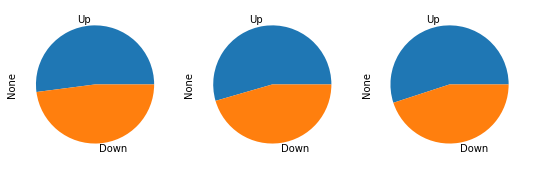

In [246]:
plt.figure(figsize=(9, 6))
y_train.value_counts().plot.pie(ax=plt.subplot(1, 3, 1))
y_val.value_counts().plot.pie(ax=plt.subplot(1, 3, 2))
y_test.value_counts().plot.pie(ax=plt.subplot(1, 3, 3))

- Le distriubuzioni sembrano abbastanza equilibrate nei tre insiemi.

## Modello di Classificazione

- La metrica di default utilizzata per valutare i modelli di classificazione è __l'accuratezza__, ovvero la percentuale di casi classificati correttamente sul totale delle classificazioni.
- In questo dominio tale metrica non risulta particolarmente utile in quanto il nostro obiettivo è quello di massimizzare il guadagno di un investitore che esegue azioni di Tradining (Compra e Vende azioni/titoli...). 
- Supponendo che il modello ottenga una buona accuratezza dato che funziona sulla maggior parte dei casi medi, ma che predica erroneamente la maggior parte dei casi estremi (forti fluttuazioni di mercato, sia Up che Down), allora potrebbe provocare perdite di denaro. 
    - Ad esempio: se a fronte di un periodo di mercato di crescita stabile, ma lenta, il modello predice correttamente l'andamento positivo di mercato, ci suggerisce di acquistare titoli (anche se ad un basso potenziale di guadagno). Alla prima brusca caduta dei titoli (dovuta ad esempio all'avvenimento di un certo evento) il modello se predirà erroneamente avremmo una grande perdita di denaro. __In altre parole essendo la metrica quantitativa e non qualitativa non è in grado di catturare il potenziale guadagno, ma solo la percentuale di successo__.

## Metrica: ROI (_Return Of Investiment_)

- Definiamo una metrica adatta al nostro dominio, che utilizzeremo per confrontare e addestrare i modelli di classificazione.

- Essendoci stato commissionato un modello di supporto alle decisioni di Trading, stabiliamo come calcolare il guadagno derivante dalle azioni di Trading.
- Ipotizziamo un trader che:
  - all'inizio di ogni giornata $d$ compra o vende (allo scoperto) un singolo titolo al suo valore di apertura $O_d$ a seconda della predizione del modello.
  - a fine giornata rivende o ricompra tale titolo al suo valore di chiusura $C_d$.
- Il guadagno (o perdita) alla fine di ciascuna giornata sarà quindi:
$$ R_d = \left\{\begin{array}{lr}C_d-O_d&:\text{pred. "Up"}\\O_d-C_d&:\text{pred. "Down"}\end{array}\right. $$

- A inizio giornata se un titolo è predetto "Up" lo compriamo in quanto il valore di apertura sarà minore di quello di chiusura, e lo rivendiamo a fine giornata. 
- Al contrario se un titolo è predetto "Down" allora il prezzo di apertura è maggiore di quello di chiusura, quindi l'azione sarà di vendere e poi ricomprare a fine giornata.
- Facendo la differenza avremmo il nostro guadagno.

- La funzione di calcolo del guadagno prende in input i valori reali e quelli predetti.
- Di quelli reali ne calcola la differenza tra chiusura e aperura, che sarà quella reale.
- Di quelli predetti va a calcolare la somma tra tutti gli ipotetici guadagni derivanti dalle predizioni del modello, sommando le effettive differenze.
    - Nel caso in cui il modello abbia predetto bene, si ha un guadagno sia con una azione Compra-Vendi che Vendi-Compra.
    - Nel caso un cui il modello abbia predetto male, si ha invece una perdita dovuta al suggerimento dell'azione sbagliata (Ad esempio: Compra-Vendi al posto che Vendi-Compra). 

In [247]:
def gain(real, pred):
    diffs = nasdaq.loc[real.index, "Close"] - nasdaq.loc[real.index, "Open"]
    return np.where(
        pred == "Up",
        diffs, # chiusura "Up": compra e vendi, guadagna C-O
        -diffs # chiusura "Down": vendi e compra, guadagna O-C
    ).sum()

- Testando ad esempio la funzione sulle y reali del validation set, ci aspettiamo un guadagno massimo.

- Questo rappresenta il guadagno nel periodo del validation set avendo seguito sempre il consiglio del modello.

In [248]:
gain(y_val, y_val)

22209.050000000003

- Il __ROI (_Return on Investment_)__ esprime il guadagno di una o più operazioni in borsa in rapporto all'investimento iniziale.
- La cifra investita in questo caso è pari al valore d'apertura del titolo che varia quotidianamente.
- Per fare una stima del ROI usiamo la media di tale valore nel periodo di investimento, ossia di test.

- Presupponiamo di investire la media dei prezzi di apertura del __Test Set__.

In [249]:
mean_open_test = nasdaq.loc[x_test.index, "Open"].mean()
mean_open_test

6140.924253658536

In [250]:
def roi(real, pred):
    return gain(real, pred) / mean_open_test

In [251]:
roi(y_val, y_val)

3.6165647193529002

- Definiamo una funzione che passati i valori reali e predetti stampi:
    - __Accuratezza__: misura di default per modelli di classificazione.
    - __ROI__: il ritorno dell'investimento.
    - __F1 measure__: Media armonica tra la precisione e la recall. Per confrontare i modelli tra loro è difficile con due misure (precisione e recall), possiamo quindi utilizzare come una sola misura, cioè la F1-measure.
    - __Guadagno__.

In [252]:
from sklearn.metrics import f1_score
def model_stat(x, y, model):
    print("Accuratezza: ", model.score(x, y))
    print("ROI: ", roi(y, model.predict(x)))
    print("Guadagno: ", gain(y, model.predict(x)))
    print("F1: ", f1_score(y, model.predict(x), average="macro"))

## Modelli di Classificazione
- Di seguito verranno testati i vari modelli di classificazione prima singolarmente per analizzarne i singoli risultati e, successivamente, mediante la grid search, per confrontarli ed eseguire il __tuning__ degli iperparametri.

## Perceptron
- Come primo modello testiamo il __Perceptron__. Questo algoritmo parte dall’idea che sommiamo ad un iperpiano casuale le istanze che vengono classificate sbagliate, assumendo che le due classi siano separabili linearmente (condizione necessaria per la convergenza).

In [253]:
%%time
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train);

CPU times: user 8.63 ms, sys: 1.72 ms, total: 10.4 ms
Wall time: 8.25 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [254]:
model_stat(x_val, y_val, perceptron)

Accuratezza:  0.4551656920077973
ROI:  -0.1341638434164318
Guadagno:  -823.8900000000122
F1:  0.31279303415941057


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Proviamo lo stesso algoritmo all'interno di una Pipeline, standardizzando i dati prima di darglieli in pasto.
- Con lo __StandardScaler()__ i dati vengono riportati nell'intervallo 0-1, centrati su media 0 e deviazione standard 1.

In [255]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
p_scale = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron())
])
p_scale.fit(x_train, y_train)

CPU times: user 20.5 ms, sys: 1.65 ms, total: 22.2 ms
Wall time: 12.9 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [256]:
model_stat(x_val, y_val, p_scale)

Accuratezza:  0.5428849902534113
ROI:  0.07589899838323745
Guadagno:  466.0900000000129
F1:  0.3576157260621433


## Regressione Logistica
- La __regressione logistica__ è un modello di classificazione binaria, che sfrutta la regressione lineare per fare classificazione.

In [257]:
%%time
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression()

log_regr.fit(x_test, y_test)

CPU times: user 10.9 ms, sys: 1.28 ms, total: 12.1 ms
Wall time: 7.3 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [258]:
model_stat(x_val, y_val, log_regr)

Accuratezza:  0.5448343079922028
ROI:  0.1341638434164318
Guadagno:  823.8900000000122
F1:  0.35268138801261834


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Anche in questo caso testiamo la regressione logistica dopo aver eseguito la standardizzazione.

In [259]:
%%time
log_scale = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression())
])
log_scale.fit(x_train, y_train)

CPU times: user 43.2 ms, sys: 2.04 ms, total: 45.2 ms
Wall time: 35.7 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [260]:
model_stat(x_val, y_val, log_scale)

Accuratezza:  0.5116959064327485
ROI:  0.031088154179114147
Guadagno:  190.90999999999804
F1:  0.5043387451533242


- Testiamo la regressione logistica applicando la __penalità l1__. Tale penalità consente di annullare alcuni parametri per rendere più semplice il modello, eliminando le variabili meno necessarie e meno influenti sulla variabile da predire.


In [261]:
%%time
log_param = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=10))
])
log_param.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 6.04 s, sys: 40.7 ms, total: 6.08 s
Wall time: 6.17 s


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [262]:
model_stat(x_val, y_val, log_param)

Accuratezza:  0.5
ROI:  -0.014312177836691066
Guadagno:  -87.89000000001033
F1:  0.4991202167435743


In [263]:
log_param.named_steps["model"].coef_

array([[ 2.65074393,  0.0556815 , -0.01230021,  0.14783217,  0.21328074,
        -0.09635498,  0.12488084,  0.        ,  6.68686258,  7.30066959,
         0.        ,  2.47452852, -5.1944039 , -3.63626817, -0.81887255,
         2.01567209, -1.44175305,  1.91987993, -3.93816952, -2.117108  ,
        -4.5176078 ,  1.36358553,  2.39042093, -0.70305162, -3.12298243,
         0.        , -1.33927904]])

- Abbiamo applicato la __norma L1__, la stessa che nei modelli di regressione viene applicata dalla LASSO. Tale penalità ci consente di eliminare i parametri meno influenti. Andando a vedere tali parametri ricavati dal modello dopo l'addestramento possiamo effettivamente vedere il peso dei coefficienti ricavati. Possiamo notare che alcuni assumono valore nullo.

- Dalla figura sotto riporatta possiamo ricavare che le features che incidono maggiormente sulla predizione della variabile dipendente (__Up__ o __Down__) sono:
    - __Open__.
    - __OpenLag2__.
    - __OPenLag3__.
    - __CloseLag1__.
    - __HighLag4__.
    ...
    
- I parametri calcolati dall'algoritmo associati a tali features sono quelli che incidono maggiormente (sia in senso positivo che negativo) sulla predizione di y.

- Altri, come ad esempio __LowLag4__ vengono invece azzerati, in quanto hanno poca influenza sulla variabile dipendente.

In [264]:
pd.Series(log_param.named_steps["model"].coef_[0], index=x_train.columns)

Open          2.650744
VolumeLag1    0.055681
ROILag1      -0.012300
ROILag2       0.147832
ROILag3       0.213281
ROILag4      -0.096355
ROILag5       0.124881
OpenLag1      0.000000
OpenLag2      6.686863
OpenLag3      7.300670
OpenLag4      0.000000
OpenLag5      2.474529
CloseLag1    -5.194404
CloseLag2    -3.636268
CloseLag3    -0.818873
CloseLag4     2.015672
CloseLag5    -1.441753
HighLag1      1.919880
HighLag2     -3.938170
HighLag3     -2.117108
HighLag4     -4.517608
HighLag5      1.363586
LowLag1       2.390421
LowLag2      -0.703052
LowLag3      -3.122982
LowLag4       0.000000
LowLag5      -1.339279
dtype: float64

- Possiamo notare che, seppur il modello risulti più semplice l'accuratezza raggiunta non è molto soddisfacente in quando ha un valore del 50%. Stesso discorso vale per il ROI di circa il 0.5%.

- Stessa cosa di prima ma con la __penalità l2__. Tale penalità limita il valore assunto dai parametri per evitare overfitting.


In [265]:
%%time
log_param_l2 = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l2", C=10))
])
log_param_l2.fit(x_train, y_train)

CPU times: user 32.4 ms, sys: 2.45 ms, total: 34.8 ms
Wall time: 32.1 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [266]:
model_stat(x_val, y_val, log_param_l2)

Accuratezza:  0.5
ROI:  -0.04223631318127494
Guadagno:  -259.370000000009
F1:  0.4968641114982578


In [267]:
%%time
from sklearn.preprocessing import PolynomialFeatures
log_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=3)), 
    ("logreg", LogisticRegression())
])

log_poly.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1min 40s, sys: 439 ms, total: 1min 41s
Wall time: 1min 41s


In [268]:
model_stat(x_val, y_val, log_poly)

Accuratezza:  0.49610136452241715
ROI:  0.005307018724519382
Guadagno:  32.590000000021064
F1:  0.4947531449221663


## SVM (_Support Vector Machines_)
- Le __SVM__ sono un modello utilizzabile sia per la classificazione che per la regressione, da qui il nome __SVC__ dove la __C__ sta per _Classification_.
- Aggiungono un __criterio di ottimalità__ per individuare la separazione lineare ottima tra le istanze delle due classi. 
- Con training set piccoli solitamnete si ottengono buoni risultati.

In [269]:
%%time
from sklearn.svm import SVC
svm_scale = Pipeline([
    ("scaler", StandardScaler()),
    ("svm",    SVC(C=40, kernel="rbf", gamma=0.13))
])
svm_scale.fit(x_train, y_train)

CPU times: user 958 ms, sys: 10.2 ms, total: 968 ms
Wall time: 956 ms


In [270]:
model_stat(x_val, y_val, svm_scale)

Accuratezza:  0.5087719298245614
ROI:  0.07236532835187606
Guadagno:  444.3899999999994
F1:  0.508770063229572


In [271]:
%%time
svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  SVC(kernel="poly", degree=3))
])
svm_poly.fit(x_train, y_train)

CPU times: user 622 ms, sys: 6.05 ms, total: 628 ms
Wall time: 633 ms


In [272]:
model_stat(x_val, y_val, svm_poly)

Accuratezza:  0.5350877192982456
ROI:  0.1106331835301917
Guadagno:  679.3900000000103
F1:  0.38644595192634373


## Grid Search

- Fino a questo momento abbiamo impostato a mano i valori dei diversi iperparametri, ovvero il grado del polinomio, il peso della regolarizzazione ecc… Il __ROI__ può infatti dipendere fortemente da questi valori, proprio per questo andiamo alla ricerca degli iperparametri che lo massimizzano.

- La __grid search__ è un metodo messo a disposizione da scikit learn che consente di eseguire automaticamente la k-fold cross validation su un modello con diversi valori degli iperparametri.

- Nei modelli di classificazione la metrica di default utilizzata su cui effettuare il ranking è l'accuratezza, ma nel nostro dominio, come descritto sopra, tale misura non è molto indicativa. A tal proposito dobbiamo cambiare la metrica utilizzata dalla __grid search__.

- Vogliamo trovare il modello che massimizzi il __ROI__. Ad esempio un modello può essere molto accurato, ma sbagliare in alcuni giorni in cui ci sono parecchie variazioni e commettere quindi molto errore. A noi interessa quindi un modello che sbagli di poco.

- Naturalmente effettuando la k-cross validation, la grid search è da eseguire sull'insieme complessivo dei dati, per poter fare il __tuning degli iperparametri__. 

- Nel nostro dominio non possiamo mischiare i dati ma dobbiamo tenere fissi quelli del validation.

- In automatico la __Grid Search__ al termine addestra il modello su tutti i dati usando gli iperparametri che hanno fornito i migliori risultati. Possiamo quindi utilizzare la gs come un modello ordinario essendo stato addestrato con gli iperparametri migliori.

- Definiamo lo __scorer__ da passare poi alla __grid search__.

In [273]:
from sklearn.metrics import make_scorer
roi_scorer = make_scorer(roi, greater_is_better=True) 
# greater_is_better=True --> perchè maggiore è il ROI maggiore sarà il guadagno.

- Normalmente la __grid search__ effettua la k-fold cross validation.
  - sono generate k divisioni tra training e validation set mescolando casualmente i dati.
  
- Nella __k-fold cross validation__ i dati vengono mescolati e presi casualmente, ma nel nostro dominio vogliamo che i dati appartenenti all'insieme di validation siano di un insieme specifico. 
    - mescolando i dati, si ha il validation su giorni non consecutivi.

In [274]:
from sklearn.model_selection import PredefinedSplit
x_for_grid_search = X[0:train_perc + validation_perc]
is_train = np.full((x_for_grid_search.shape[0], 1), False, dtype=bool)
is_train[0:train_perc] = True
split = PredefinedSplit(np.where(is_train, -1, 0))

- Definiamo la Pipeline per __Perceptron__.

In [275]:
perceptron_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron(random_state=42))
])

perceptron_grid = {
    "scaler": [None, StandardScaler()],
    "model__penalty": [None, "l1", "l2", "elasticnet"], # Penalizzazioni Lasso, Ridge, Elastic.
    "model__alpha": np.logspace(-3, 3, 7) # Peso della regolarizzazione.
}

- Definiamo la Pipeline per la __regressione logistica__.

In [276]:
log_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(random_state=42))
])

log_grid = {
    "scaler": [None, StandardScaler()],
    "model__penalty": ["l1", "l2"],
    "model__C": np.logspace(-3, 3, 7)
}

- Definiamo la Pipeline per le __SVC__.

In [277]:
svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  SVC(random_state=42))
])

svc_grid = [{
    # Grid for SVC with rbs.
    "model__kernel": ["rbf"],
    "model__C": np.logspace(-3, 3, 7),
    "model__gamma": np.logspace(-3, 3, 7) # Gamma: regola ampiezza gaussiane.
},
{
    # Grid for SVC with poly.
    "model__kernel": ["poly"],
    "model__C": np.logspace(-3, 3, 7),
    "model__degree": range(1, 5)
}]

- Importiamo e inizializziamo la __GridSearchCV__ che effettuerà la cross validation e a cui passeremo sia lo scorer che lo splitter predefinito. 


In [278]:
from sklearn.model_selection import GridSearchCV

# Sistemiamo la y in base alle x scelte per la grid search.
y_for_grid_search = y.reindex_like(x_for_grid_search)

In [279]:
gs_perceptron = GridSearchCV(perceptron_pipeline, perceptron_grid, scoring=roi_scorer, cv=split)
gs_perceptron.fit(x_for_grid_search, y_for_grid_search)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'scaler': [None, StandardScaler(copy=True, with_mean=True, with_std=True)], 'model__penalty': [None, 'l1', 'l2', 'elasticnet'], 'model__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roi), verbose=0)

In [280]:
pd.DataFrame(gs_perceptron.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__penalty,param_scaler,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
3,0.009932,0.0,0.002148,0.0,0.001,l1,"StandardScaler(copy=True, with_mean=True, with...","{'model__alpha': 0.001, 'model__penalty': 'l1'...",0.049186,0.049186,0.0,1,0.502198,0.502198,0.0
33,0.013374,0.0,0.002141,0.0,10,None,"StandardScaler(copy=True, with_mean=True, with...","{'model__alpha': 10.0, 'model__penalty': None,...",0.022532,0.022532,0.0,2,0.858907,0.858907,0.0
1,0.008556,0.0,0.002206,0.0,0.001,None,"StandardScaler(copy=True, with_mean=True, with...","{'model__alpha': 0.001, 'model__penalty': None...",0.022532,0.022532,0.0,2,0.858907,0.858907,0.0
25,0.008324,0.0,0.002245,0.0,1,None,"StandardScaler(copy=True, with_mean=True, with...","{'model__alpha': 1.0, 'model__penalty': None, ...",0.022532,0.022532,0.0,2,0.858907,0.858907,0.0
9,0.008365,0.0,0.002188,0.0,0.01,None,"StandardScaler(copy=True, with_mean=True, with...","{'model__alpha': 0.01, 'model__penalty': None,...",0.022532,0.022532,0.0,2,0.858907,0.858907,0.0


In [281]:
gs_log = GridSearchCV(log_pipeline, log_grid, scoring=roi_scorer, cv=split)
gs_log.fit(x_for_grid_search, y_for_grid_search)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureW

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'scaler': [None, StandardScaler(copy=True, with_mean=True, with_std=True)], 'model__penalty': ['l1', 'l2'], 'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roi), verbose=0)

In [282]:
pd.DataFrame(gs_log.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_scaler,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
22,0.025998,0.0,0.045393,0.0,100,l2,None,"{'model__C': 100.0, 'model__penalty': 'l2', 's...",0.134164,0.134164,0.0,1,-0.777769,-0.777769,0.0
2,0.008881,0.0,0.001824,0.0,0.001,l2,None,"{'model__C': 0.001, 'model__penalty': 'l2', 's...",0.134164,0.134164,0.0,1,-0.777769,-0.777769,0.0
18,0.008317,0.0,0.001817,0.0,10,l2,None,"{'model__C': 10.0, 'model__penalty': 'l2', 'sc...",0.134164,0.134164,0.0,1,-0.777769,-0.777769,0.0
6,0.008672,0.0,0.001880,0.0,0.01,l2,None,"{'model__C': 0.01, 'model__penalty': 'l2', 'sc...",0.134164,0.134164,0.0,1,-0.777769,-0.777769,0.0
14,0.008605,0.0,0.001826,0.0,1,l2,None,"{'model__C': 1.0, 'model__penalty': 'l2', 'sca...",0.134164,0.134164,0.0,1,-0.777769,-0.777769,0.0


In [283]:
gs_svc = GridSearchCV(svc_pipeline, svc_grid, scoring=roi_scorer, cv=split)
gs_svc.fit(x_for_grid_search, y_for_grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'model__kernel': ['rbf'], 'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'model__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}, {'model__kernel': ['poly'], 'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'model__degree': range(1, 5)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roi), verbose=0)

In [284]:
pd.DataFrame(gs_svc.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,param_model__degree,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
31,0.739711,0.0,0.100864,0.0,10,1,rbf,NaN,"{'model__C': 10.0, 'model__gamma': 1.0, 'model...",0.214373,0.214373,0.0,1,12.751390,12.751390,0.0
24,0.522822,0.0,0.105384,0.0,1,1,rbf,NaN,"{'model__C': 1.0, 'model__gamma': 1.0, 'model_...",0.209947,0.209947,0.0,2,11.401808,11.401808,0.0
59,0.391465,0.0,0.071649,0.0,0.1,NaN,poly,3,"{'model__C': 0.1, 'model__degree': 3, 'model__...",0.209407,0.209407,0.0,3,0.502120,0.502120,0.0
45,0.943193,0.0,0.098068,0.0,1000,1,rbf,NaN,"{'model__C': 1000.0, 'model__gamma': 1.0, 'mod...",0.173549,0.173549,0.0,4,12.977695,12.977695,0.0
38,0.896102,0.0,0.096760,0.0,100,1,rbf,NaN,"{'model__C': 100.0, 'model__gamma': 1.0, 'mode...",0.160720,0.160720,0.0,5,12.977695,12.977695,0.0


- Testiamo anche un modello di classificazione basato sulle __RandomForest__.
- Sono un tipo di algoritmo basato su __ensemble learning__ in cui vengono combinati diversi algoritmi per ottenere un modello di predizione migliore. Combina una serie di alberi decisionali, creando una foresta, ed in questo caso è utilizzato come classificatore.
- Questo algoritmo estrapola N record casuali dal DataSet per creare un albero decisionale, basato su questi N record. Questo procedimento viene ripetuto N volte. 
- L'iperparametro __n_estimators__ di cui effettuiamo il __tuning__ nella __Grid Search__ è il numero di alberi che formano la foresta.

In [285]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  RandomForestClassifier(random_state=42))
])

rf_grid = {
    "model__n_estimators": range(20, 100)
}

In [286]:
gs_rf = GridSearchCV(rf_pipeline, rf_grid, scoring=roi_scorer, cv=split)
gs_rf.fit(x_for_grid_search, y_for_grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
   ...rs='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__n_estimators': range(20, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roi), verbose=0)

In [287]:
pd.DataFrame(gs_rf.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
2,0.341545,0.0,0.006117,0.0,22,{'model__n_estimators': 22},0.111711,0.111711,0.0,1,12.962964,12.962964,0.0
0,0.314360,0.0,0.006808,0.0,20,{'model__n_estimators': 20},0.095772,0.095772,0.0,2,12.952210,12.952210,0.0
1,0.320196,0.0,0.010047,0.0,21,{'model__n_estimators': 21},0.089112,0.089112,0.0,3,12.956883,12.956883,0.0
47,0.981425,0.0,0.013366,0.0,67,{'model__n_estimators': 67},0.078785,0.078785,0.0,4,12.977695,12.977695,0.0
3,0.350084,0.0,0.006324,0.0,23,{'model__n_estimators': 23},0.071356,0.071356,0.0,5,12.975545,12.975545,0.0


- Testiamo anche un modello di classificazione basato sul __Gradient Boosting__. 
- È un modello che si basa su algoritmi che addestrano alberi decisionali. Ogni osservazione viene pesata in maniera equivalente alla creazione del primo albero. Successivamente si va ad incrementare il peso associato alle osservazioni di difficile classificazione, e viceversa a diminuire quello delle osservazione di facile classificazione. Viene costruito quindi un secondo albero su questi nuovi dati pesati. Una volta fatta questa operazione viene calcolato l'errore di classificazione compiuto dall'unione di questi due alberi, per costruirne un terzo. Questo procedimento viene eseguito iterativamente per decrementare ogni volta l'errore residuo.

- L'iperparametro __n_estimators__ di cui effettuiamo il __tuning__ nella __Grid Search__ rappresenta il numero di iterazioni (__boosting stages__) da eseguire.
- Il modello è poco soggetto ad __Overfitting__.

In [288]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  GradientBoostingClassifier(random_state=42))
])

gb_grid = {
    "model__n_estimators": range(20, 100)
}

In [289]:
gs_gb = GridSearchCV(gb_pipeline, gb_grid, scoring=roi_scorer, cv=split)
gs_gb.fit(x_for_grid_search, y_for_grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decre...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__n_estimators': range(20, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roi), verbose=0)

In [290]:
pd.DataFrame(gs_gb.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
60,0.520804,0.0,0.002907,0.0,80,{'model__n_estimators': 80},0.228124,0.228124,0.0,1,5.697641,5.697641,0.0
35,0.358876,0.0,0.002637,0.0,55,{'model__n_estimators': 55},0.225942,0.225942,0.0,2,4.695577,4.695577,0.0
33,0.344948,0.0,0.002642,0.0,53,{'model__n_estimators': 53},0.218040,0.218040,0.0,3,4.677407,4.677407,0.0
34,0.354697,0.0,0.002670,0.0,54,{'model__n_estimators': 54},0.218040,0.218040,0.0,3,4.706748,4.706748,0.0
62,0.540022,0.0,0.002868,0.0,82,{'model__n_estimators': 82},0.216800,0.216800,0.0,5,5.738384,5.738384,0.0


- Il numero di iterazioni ottenuto dalla __grid search__ risulta abbastanza alto in quanto, essendo il modello scarsamemte soggetto ad __Overfitting__, solitamente un numero maggiore di iterazioni comporta un miglioramento delle prestazioni.

## Modello Randomico

- Il __ROI__ migliore che abbiamo ottenuto dai nostri modelli è __22.8%__, ora lo andiamo a confrontare con modelli randomici.

- Per prima cosa testiamo un modello che predice __Up__ e __Down__ casualmente.

In [291]:
random_preds = np.random.choice(["Up", "Down"], len(y_val))
np.mean([roi(y_val, preds) for preds in random_preds])

-0.0018306957191325972

- Come si può notare il ROI ottenuto da un modello di predizione casuale è molto basso o addirittura negativo 

- Ora testiamo un modello che predice tutti __Up__

In [292]:
roi(y_val, np.repeat("Up", len(y_val)))

0.1341638434164318

- In questo caso il __ROI__ è più alto, questo può essere dovuto al fatto che la distribuzione delle etichette Up e Down nel validation set pende a favore di quelle Up. 

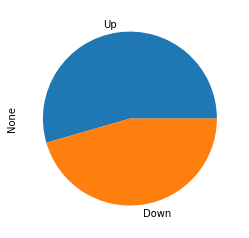

In [293]:
y_val.value_counts().plot.pie()

- Il nostro modello continua ad essere superiore di circa 10 punti percentuali.

## Valutazione modell di Classificazione

- La valutazione dei modelli di classificazione la possiamo effettare sul __Test Set__ che abbiamo separato dai dati di analisi inizialmente.

- Per la valutazione dei modelli di classificazione possiamo utilizzare la __matrice di confusione__, ovvero una matrice che permette di valutare l'effettiva accuratezza delle decisioni prese dal modello. 

- In questa matrice abbiamo sulla diagonale tutte le istanze classificate correttamente, mentre nelle altre celle quelle classificate in maniera errata.

- Otteniamo la matrice dal modello con ROI maggiore ottenuto con la __Grid Search__.

In [294]:
from sklearn.metrics import confusion_matrix
y_pred_svc = gs_svc.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred_svc)

In [295]:
classes = ["Up", "Down"]
pd.DataFrame(cm, index=classes, columns=classes)

,Up,Down
Up,112,349
Down,139,425


In [296]:
cm.diagonal().sum() / cm.sum()

0.5239024390243903

- Da questa matrice possiamo calcolare le metriche principali, come __l'accuratezza__ (metrica di default dei modelli di classificazione), __precision__ (percentuale di esempi classificati come X che sono realmente tali) e __recall__ (percentuale di esempi realmente di classe X che sono stati rilevati essere tali dal modello).

- Valutare due modelli utilizzando più metriche può risultare complesso, per questo si può utilizzare un'unica metrica che riassume le due, la __F1 measure__.

In [297]:
f1_score(y_test, y_pred_svc, average="macro")

0.47494163685527624

- Possiamo effettuare le stesse considerazioni anche sugli altri modelli, come ad esempio __RandomForest o GradientBoosting__.

In [298]:
y_pred_rfr = gs_rf.best_estimator_.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rfr)

In [299]:
classes = ["Up", "Down"]
pd.DataFrame(cm_rf, index=classes, columns=classes)

,Up,Down
Up,406,55
Down,504,60


In [300]:
cm_rf.diagonal().sum() / cm_rf.sum()

0.45463414634146343

## Ensembling

- __L'Apprendimento ensemble (apprendimento d'insieme)__ in statistica e apprendimento automatico sono una serie di metodi d'insieme che usano modelli multipli per ottenere una miglior prestazione predittiva rispetto ai modelli da cui è costituito.

- Il nostro obiettivo non è quello di individuare il solo modello che massimizza il ROI, ma di ottenerne i tre migliori per poter eseguire l'apprendimento __ensemble__.

- Possiamo combinare i tre modelli migliori per farli lavorare insieme e ottenere tre risposte predittive separate dando come output la predizione ottenuta dalla maggioranza.

- I modelli che abbiamo scelto per effettuare __ensembling__ sono:
    - __SVC__ (_Support Vector Machine for Classification_)
    - __LR__ (_Logistic Regression_)
    - __GB__ (_Gradient Boosting_)

In [301]:
from sklearn.ensemble import VotingClassifier

# Lista di modelli utilizzati per la classificazione.
estimators=[('svc', gs_svc.best_estimator_), ('log', gs_log.best_estimator_), ('gb', gs_gb.best_estimator_)]

# Creiamo la classe di ensambling.
# voting='hard': indica che la "maggioranza vince".
ensemble = VotingClassifier(estimators, voting='hard')

In [302]:
ensemble.fit(x_for_grid_search, y_for_grid_search)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('svc', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random... subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

## Considerazioni sui modelli

- Avendo trovato i modelli migliori utilizzando la __Grid Search__ e quindi addestrando i dati mediante la __k-fold cross validation__ ed avendoli uniti per effettuare __ensemble__ possiamo andare a testarne le accuratezze sul __Test Set__.

In [303]:
model_stat(x_test, y_test, ensemble)

Accuratezza:  0.5473170731707317
ROI:  0.3132362361991356
Guadagno:  1923.5599999999858
F1:  0.4711465755739994


In [304]:
model_stat(x_test, y_test, gs_gb.best_estimator_)

Accuratezza:  0.4790243902439024
ROI:  0.2356843921560728
Guadagno:  1447.319999999997
F1:  0.4429030314380399


In [305]:
model_stat(x_test, y_test, gs_log.best_estimator_)

Accuratezza:  0.5502439024390244
ROI:  0.16471787604241622
Guadagno:  1011.5199999999941
F1:  0.354940213971051


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [306]:
model_stat(x_test, y_test, gs_svc.best_estimator_)

Accuratezza:  0.5239024390243903
ROI:  0.17077559609617435
Guadagno:  1048.7199999999912
F1:  0.47494163685527624


- Sono state valutate le statistiche dei modelli realizzati. 
- Da questi risultati possiamo vedere che il modello di __ensembling__ porta a risultati migliori in termini di __ROI__ rispetto ad altri modelli. 
- Il modello di __ensembling__, infatti, basandosi sulle decisioni dei singoli modelli, e scegliendo l'opzione votata dalla maggioranza porta ad un miglioramento in termini di guadagno.
- La tripletta di modelli (diversi) scelti per costruire il modello di __ensembling__ è stata scelta in questo modo:
    - __Gradient Boosting__: massimo ROI sul __Validation Set__.
    - __SVC__: secondo per ROI massimo sul __Validation Set__.
    - __Logistic Regression__: terzo per ROI massimo sul __Validation Set__.
- I risultati del modello di __ensambling__ sono buoni in termini di: 
    - __Accuratezza__: in quanto al suo interno sono presenti modelli con buona accuratezza (svc, logistic). 
    - __ROI__: massimo in quanto il modello di Gradient Boosting massimizza il guadagno.


## Confidenza
- Valutiamo l'attendibilità dell'accuratezza sull'intera popolazione dei dati, ovvero quelli ignoti. 
- Non vogliamo un singolo valore, ma un __intervallo di accuratezze__. Un’insieme di valori che assumerà l’accuratezza sui dati futuri. La dimensione dell’intervallo di accuratezza dipende dalla dimensione del test set (numero di istanze), più è piccolo il test set, più l’intervallo è grande.
- __L'accuratezza futura__ cadrà in un dato intervallo con una certa __confidenza__.
- La __confidenza__ la fissiamo noi al 95% e al 99%.

In [307]:
N = x_test.shape[0]
acc = 0.55
alpha = 0.95
Z = 1.96

In [308]:
import math
a = 2 * N * acc + Z * Z
b = Z * math.sqrt(Z * Z + 4 * N * acc - 4 * N * acc * acc)
d = 2 * (N + Z * Z)

p_up = (a + b) / d
p_down = (a - b) / d

In [309]:
p_up

0.5802135860700166

In [310]:
p_down

0.5194130231184143

In [311]:
Z99 = 2.58

In [312]:
a = 2 * N * acc + Z99 * Z99
b = Z99 * math.sqrt(Z99 * Z99 + 4 * N * acc - 4 * N * acc * acc)
d = 2 * (N + Z99 * Z99)

p_up99 = (a + b) / d
p_down99 = (a - b) / d

In [313]:
p_up99

0.5896400096058094

In [314]:
p_down99

0.5097147755726666

- __L'accuratezza__ futura (su dati ignoti) cadrà all'interno dell'intervallo __[0.52, 0,58]__ con il __95%__ di __confidenza__. 
- __L'accuratezza__ futura (su dati ignoti) cadrà all'interno dell'intervallo __[0.51, 0,59]__ con il __99%__ di __confidenza__. 

- Andiamo a confrontare l'efficacia del nostro modello di ensembling a confronto con un modello randomico, con confidenza del 99%.
- Come accuratezza abbiamo utilizzato il __ROI__, in quanto è la misura su cui vogliamo confrontare i nostri modelli.

In [315]:
# Calcoliamo il ROI sul test set con il modello randomico.
random_preds = np.random.choice(["Up", "Down"], len(y_test))
res = np.mean([roi(y_test, preds) for preds in random_preds])

In [316]:
e_ens = 1 - 0.31
e_rand = 1 - res
d = np.abs(e_ens - e_rand)
z = 2.58
sigma_e1 = (e_ens * (1 - e_ens)) / N
sigma_e2 = (e_rand * (1 - e_rand)) / N
sigma = math.sqrt(sigma_e1 + sigma_e2)
dt_down = d - z * sigma
dt_up = d + z * sigma

In [317]:
dt_up

0.3406591056806216

In [318]:
dt_down

0.2648778613010199

- L'intervallo non contiene zero quindi la differenza tra il nostro modello e quello randomico è __statisticamente significativa__.

# Predizione mediante Regressione

- In questo paragrafo, basandoci sui dati predisposti precedentemente, abbiamo deciso di predire il __prezzo di chiusura__ del mercato al termine della giornata in esame come supporto decisionale al modello di classificazione.

In [319]:
X.head(5)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-08,2363.80,1.200900e+09,1.431144,1.519161,1.971238,0.023103,1.074501,2293.27,2286.13,2207.75,...,2333.70,2320.95,2251.77,2233.57,2200.63,2284.24,2286.13,2206.49,2192.68,2165.74
1999-01-11,2373.97,1.286690e+09,-0.820289,1.431144,1.519161,1.971238,0.023103,2363.80,2293.27,2286.13,...,2369.55,2333.70,2320.95,2251.77,2233.57,2314.95,2284.24,2286.13,2206.49,2192.68
1999-01-12,2395.90,1.140930e+09,0.447352,-0.820289,1.431144,1.519161,1.971238,2373.97,2363.80,2293.27,...,2384.72,2369.55,2333.70,2320.95,2251.77,2348.24,2314.95,2284.24,2286.13,2206.49
1999-01-13,2222.28,1.107300e+09,-3.136608,0.447352,-0.820289,1.431144,1.519161,2395.90,2373.97,2363.80,...,2396.30,2384.72,2369.55,2333.70,2320.95,2320.21,2348.24,2314.95,2284.24,2286.13
1999-01-14,2337.31,1.195470e+09,4.253739,-3.136608,0.447352,-0.820289,1.431144,2222.28,2395.90,2373.97,...,2353.33,2396.30,2384.72,2369.55,2333.70,2205.69,2320.21,2348.24,2314.95,2284.24


- Avendo già predisposto i dati precedentemente, ci basta cambiare la variabile su cui effettuare la predizione (__Close__).
- Eseguiamo la divisione tra __training set__, __validation set__ e __test set__.

In [320]:
y_reg_train = nasdaq["Close"].reindex_like(x_train)

In [321]:
y_reg_train.index == x_train.index # Test.

array([ True,  True,  True, ...,  True,  True,  True])

In [322]:
y_reg_val = nasdaq["Close"].reindex_like(x_val)

In [323]:
y_reg_val.index == x_val.index # Test.

array([ True,  True,  True, ...,  True,  True,  True])

In [324]:
y_reg_test = nasdaq["Close"].reindex_like(x_test)

In [325]:
y_reg_test.index == x_test.index # Test.

array([ True,  True,  True, ...,  True,  True,  True])

- Per prima cosa valutiamo l'errore commesso da un semplice modello di __regressione lineare__ sui nostri dati.

In [326]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train, y_reg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [327]:
pd.Series(lrm.coef_, index=x_train.columns)

Open          1.035110e+00
VolumeLag1    1.235395e-09
ROILag1      -1.651251e+00
ROILag2       6.461379e-02
ROILag3       4.050479e+00
ROILag4      -2.587203e+00
ROILag5       3.865701e+00
OpenLag1     -1.991446e-02
OpenLag2      2.098001e-01
OpenLag3      3.785728e-01
OpenLag4     -2.121490e-01
OpenLag5      3.443730e-01
CloseLag1    -9.064602e-02
CloseLag2    -1.239635e-01
CloseLag3    -9.574691e-02
CloseLag4     8.347509e-02
CloseLag5    -7.316485e-02
HighLag1      1.312175e-01
HighLag2     -1.054719e-01
HighLag3     -1.892919e-01
HighLag4     -6.384053e-02
HighLag5     -7.337618e-02
LowLag1       3.993980e-02
LowLag2      -3.077144e-02
LowLag3      -1.121495e-01
LowLag4       9.634339e-02
LowLag5      -1.346983e-01
dtype: float64

- Possiamo vedere il peso dei parametri del modello sulle __features__.
- La __Open__ o __ROILag__ ad esempio incidono particolarmente sulla predizione del valore della __Close__ (sia in positivo che in negativo).

## Misurare l'Errore del Modello

- Per misurare l'errore che un modello compie su un set di dati esistono diverse metriche:
    - __Errore quadratico medio__ (MSE): la media dei quadrati dei singoli errori.
    - __Errore relativo__: errore relativo misura intuitivamente di quanto il modello si sbaglia in percentuale rispetto al valore reale.
    - __Coefficiente di determinazione__ $R^2$: è una misura che esprime intuitivamente quanto il modello catturi la variabilità presente nei dati.

In [328]:
from sklearn.metrics import mean_squared_error

In [329]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [330]:
def reg_stats(X, y, model):
    print("   Mean squared error: {:.5}".format(mean_squared_error(model.predict(X), y)))
    print("       Relative error: {:.5%}".format(relative_error(model.predict(X), y)))
    print("R-squared coefficient: {:.5}".format(model.score(X, y)))

- Ora definite queste funzioni possiamo ottenere le statistiche del modello sopra definito.

In [331]:
reg_stats(x_val, y_reg_val, lrm)

   Mean squared error: 1013.5
       Relative error: 0.71604%
R-squared coefficient: 0.99824


## Modelli Predittivi

- Andiamo alla ricerca del modello di regressione che minimizzi l'errore commesso nella predizione della variabile dipendente (__Close__).

- Prima di procedere con la creazione dei vari modelli predittivi, possiamo utilizzare la __regressione LASSO__ per valutare il peso che ogni feature ha sulla variabile dipendente (y).

In [332]:
from sklearn.linear_model import Lasso
model_lasso = Pipeline([
    ("scale",  StandardScaler()),
    ("lasso", Lasso(alpha=2)) # Più alpha è alto più il modello si impegnerà a minimizzare ed azzerare i theta.
])
model_lasso.fit(x_train, y_reg_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [333]:
model_lasso.named_steps["lasso"].coef_

array([611.07308647,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   2.888354  ,
         8.09728624,   1.8996511 ,   0.        ,   6.25830724,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [334]:
reg_stats(x_val, y_reg_val, model_lasso)

   Mean squared error: 1086.7
       Relative error: 0.75631%
R-squared coefficient: 0.99812


In [335]:
pd.Series(model_lasso.named_steps["lasso"].coef_, index=x_train.columns)

Open          611.073086
VolumeLag1     -0.000000
ROILag1        -0.000000
ROILag2        -0.000000
ROILag3         0.000000
ROILag4         0.000000
ROILag5        -0.000000
OpenLag1        2.888354
OpenLag2        8.097286
OpenLag3        1.899651
OpenLag4        0.000000
OpenLag5        6.258307
CloseLag1       0.000000
CloseLag2       0.000000
CloseLag3       0.000000
CloseLag4       0.000000
CloseLag5       0.000000
HighLag1        0.000000
HighLag2        0.000000
HighLag3        0.000000
HighLag4        0.000000
HighLag5        0.000000
LowLag1         0.000000
LowLag2         0.000000
LowLag3         0.000000
LowLag4         0.000000
LowLag5         0.000000
dtype: float64

- Abbiamo utilizzato la __regressione lasso__ e valutato i coefficienti assegnati alle singole feature. Questa regressione ha portato ad una netta semplificazione del modello, azzerando la maggior parte dei parametri. Nonostante questo __l'MSE__ è molto simile a quello della __regressione lineare__.

- Come fatto precedentemente abbiamo la necessità di selezionare l'insieme di dati sul totale che devono essere utilizzati come __Validation Set__ nella grid search.
- Possiamo utilizzare la suddivisione fatta in precedenza, aggiustando le sole nuove y.

In [336]:
y_reg_for_grid_search = nasdaq["Close"].reindex_like(x_for_grid_search)

In [337]:
y_reg_for_grid_search.index == x_for_grid_search.index # Test

array([ True,  True,  True, ...,  True,  True,  True])

In [338]:
from sklearn.linear_model import ElasticNet
model_elastic_reg = Pipeline([
    ("scale", StandardScaler()),
    ("model", ElasticNet())
])

grid_elastic_reg = {
    "scale": [None, StandardScaler()],
    "model__alpha": [0.1, 1, 10, 100],
    "model__l1_ratio": np.linspace(0, 1, 11)
}

- Come metrica di valutazione dei nostri modelli vogliamo utilizzare __l'MSE__ a differenza del coefficente $R^2$ di default, in quanto a noi interessa minimizzare l'errrore della predizione del prezzo di chiusura

In [339]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

- Ora come nell'analisi precedente andiamo a testare i vari modelli con le __Grid Search__.

In [340]:
gs_elastic_reg = GridSearchCV(model_elastic_reg, param_grid=grid_elastic_reg, cv=split, scoring=mse_scorer)
gs_elastic_reg.fit(x_for_grid_search, y_reg_for_grid_search)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'scale': [None, StandardScaler(copy=True, with_mean=True, with_std=True)], 'model__alpha': [0.1, 1, 10, 100], 'model__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [341]:
pd.DataFrame(gs_elastic_reg.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_scale,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
60,0.092987,0.0,0.001526,0.0,10,0.8,None,"{'model__alpha': 10, 'model__l1_ratio': 0.8, '...",-937.417606,-937.417606,0.0,1,-1569.865800,-1569.865800,0.0
58,0.090354,0.0,0.001347,0.0,10,0.7,None,"{'model__alpha': 10, 'model__l1_ratio': 0.7000...",-937.429507,-937.429507,0.0,2,-1569.605279,-1569.605279,0.0
56,0.096387,0.0,0.001574,0.0,10,0.6,None,"{'model__alpha': 10, 'model__l1_ratio': 0.6000...",-937.480829,-937.480829,0.0,3,-1569.384812,-1569.384812,0.0
54,0.099765,0.0,0.001952,0.0,10,0.5,None,"{'model__alpha': 10, 'model__l1_ratio': 0.5, '...",-937.619091,-937.619091,0.0,4,-1569.203788,-1569.203788,0.0
52,0.091667,0.0,0.002001,0.0,10,0.4,None,"{'model__alpha': 10, 'model__l1_ratio': 0.4, '...",-937.882080,-937.882080,0.0,5,-1569.039043,-1569.039043,0.0


- Come si nota dalla grid search __l'MSE__ è negativo, questo è dovuto al fatto che lo scorer cambia di segno il risultato (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).

In [342]:
from sklearn.kernel_ridge import KernelRidge
model_kernel = Pipeline([
    ("scale", StandardScaler()),
    ("regr", KernelRidge())
])

alpha_vals = np.logspace(-1, 3, 5) # Peso della regolarizzazione.

grid_kernel = [{
    "scale": [None, StandardScaler()],
    "regr__alpha": alpha_vals,
    "regr__kernel": ["poly"],
    "regr__degree": range(1, 5)
},
{
    "scale": [None, StandardScaler()],
    "regr__alpha": alpha_vals, 
    "regr__kernel": ["rbf"], 
    "regr__gamma": np.logspace(-3, 3, 7) # Ampiezza gaussiana.
}]

In [343]:
gs_kernel_reg = GridSearchCV(model_kernel, param_grid=grid_kernel, cv=split, scoring=mse_scorer)
gs_kernel_reg.fit(x_for_grid_search, y_reg_for_grid_search)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'scale': [None, StandardScaler(copy=True, with_mean=True, with_std=True)], 'regr__alpha': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'regr__kernel': ['poly'], 'regr__degree': range(1, 5)}, {'scale': [None, StandardScaler(copy=True, with_mean=True, with_std=True)], 'regr__alpha': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'regr__kernel': ['rbf'], 'regr__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
    

In [344]:
pd.DataFrame(gs_kernel_reg.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,param_regr__degree,param_regr__kernel,param_scale,param_regr__gamma,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
0,12.128174,0.0,0.021503,0.0,0.1,1,poly,None,NaN,"{'regr__alpha': 0.1, 'regr__degree': 1, 'regr_...",-954.799138,-954.799138,0.0,1,-1719.280837,-1719.280837,0.0
1,0.377739,0.0,0.020709,0.0,0.1,1,poly,"StandardScaler(copy=True, with_mean=True, with...",NaN,"{'regr__alpha': 0.1, 'regr__degree': 1, 'regr_...",-975.680363,-975.680363,0.0,2,-1637.728615,-1637.728615,0.0
8,11.183776,0.0,0.021471,0.0,1,1,poly,None,NaN,"{'regr__alpha': 1.0, 'regr__degree': 1, 'regr_...",-1074.010101,-1074.010101,0.0,3,-1777.911477,-1777.911477,0.0
3,0.376097,0.0,0.022104,0.0,0.1,2,poly,"StandardScaler(copy=True, with_mean=True, with...",NaN,"{'regr__alpha': 0.1, 'regr__degree': 2, 'regr_...",-1086.418674,-1086.418674,0.0,4,-1411.934175,-1411.934175,0.0
16,10.965712,0.0,0.021193,0.0,10,1,poly,None,NaN,"{'regr__alpha': 10.0, 'regr__degree': 1, 'regr...",-1102.465782,-1102.465782,0.0,5,-1826.074296,-1826.074296,0.0


In [345]:
from sklearn.svm import SVR
model_svr = Pipeline([
    ("scale", StandardScaler()),
    ("svr", SVR())
])

c_vals = [0.1, 1, 10, 100, 1000] # Peso della regolarizzazione.
epsilon_val = [0.1, 0.2, 0.5, 0.8, 1.0] 

grid_svr = [{
    "svr__C": c_vals,
    "svr__kernel": ["poly"],
    "svr__degree": range(1, 5),
    "svr__epsilon": epsilon_val
},
{
    "svr__C": c_vals, 
    "svr__kernel": ["rbf"], 
    "svr__gamma": ['auto', 'scale'],
    "svr__epsilon": epsilon_val
}]

In [346]:
gs_svr_reg = GridSearchCV(model_svr, param_grid=grid_svr, cv=split, scoring=mse_scorer)
gs_svr_reg.fit(x_for_grid_search, y_reg_for_grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'svr__C': [0.1, 1, 10, 100, 1000], 'svr__kernel': ['poly'], 'svr__degree': range(1, 5), 'svr__epsilon': [0.1, 0.2, 0.5, 0.8, 1.0]}, {'svr__C': [0.1, 1, 10, 100, 1000], 'svr__kernel': ['rbf'], 'svr__gamma': ['auto', 'scale'], 'svr__epsilon': [0.1, 0.2, 0.5, 0.8, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [347]:
pd.DataFrame(gs_svr_reg.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__degree,param_svr__epsilon,param_svr__kernel,param_svr__gamma,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
80,1.718267,0.0,0.075013,0.0,1000,1,0.1,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-876.904952,-876.904952,0.0,1,-1620.228547,-1620.228547,0.0
81,1.763831,0.0,0.074337,0.0,1000,1,0.2,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-877.075602,-877.075602,0.0,2,-1620.486341,-1620.486341,0.0
83,1.492604,0.0,0.073176,0.0,1000,1,0.8,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-877.317737,-877.317737,0.0,3,-1620.630725,-1620.630725,0.0
84,1.514474,0.0,0.074091,0.0,1000,1,1,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-877.456255,-877.456255,0.0,4,-1621.438779,-1621.438779,0.0
82,1.622980,0.0,0.073535,0.0,1000,1,0.5,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-877.458939,-877.458939,0.0,5,-1619.686434,-1619.686434,0.0


In [348]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  GradientBoostingRegressor(random_state=42))
])

grid_gb_reg = {
    "model__n_estimators": range(20, 100)
}

In [349]:
gs_gb_reg = GridSearchCV(model_gb_reg, param_grid=grid_gb_reg, cv=split, scoring=mse_scorer)
gs_gb_reg.fit(x_for_grid_search, y_reg_for_grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
   ...=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__n_estimators': range(20, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [350]:
pd.DataFrame(gs_gb_reg.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
44,0.385330,0.0,0.002020,0.0,64,{'model__n_estimators': 64},-2262.297794,-2262.297794,0.0,1,-979.811524,-979.811524,0.0
43,0.380458,0.0,0.001798,0.0,63,{'model__n_estimators': 63},-2264.100324,-2264.100324,0.0,2,-984.549592,-984.549592,0.0
47,0.404437,0.0,0.001797,0.0,67,{'model__n_estimators': 67},-2285.271374,-2285.271374,0.0,3,-969.045698,-969.045698,0.0
46,0.405788,0.0,0.001798,0.0,66,{'model__n_estimators': 66},-2290.257285,-2290.257285,0.0,4,-972.607912,-972.607912,0.0
45,0.395698,0.0,0.001838,0.0,65,{'model__n_estimators': 65},-2290.619319,-2290.619319,0.0,5,-975.728901,-975.728901,0.0


In [351]:
from sklearn.ensemble import RandomForestRegressor
model_rf_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  RandomForestRegressor(random_state=42))
])

grid_rf_reg = {
    "model__n_estimators": range(20, 100)
}

In [352]:
gs_rf_reg = GridSearchCV(model_rf_reg, param_grid=grid_rf_reg, cv=split, scoring=mse_scorer)
gs_rf_reg.fit(x_for_grid_search, y_reg_for_grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_s...rs='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__n_estimators': range(20, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [353]:
pd.DataFrame(gs_rf_reg.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
78,4.337132,0.0,0.013290,0.0,98,{'model__n_estimators': 98},-2428.993018,-2428.993018,0.0,1,-268.288185,-268.288185,0.0
77,4.272121,0.0,0.012729,0.0,97,{'model__n_estimators': 97},-2430.714999,-2430.714999,0.0,2,-268.362256,-268.362256,0.0
74,4.136028,0.0,0.012422,0.0,94,{'model__n_estimators': 94},-2443.369536,-2443.369536,0.0,3,-269.661550,-269.661550,0.0
73,4.206757,0.0,0.013006,0.0,93,{'model__n_estimators': 93},-2446.038537,-2446.038537,0.0,4,-269.716491,-269.716491,0.0
76,4.190023,0.0,0.014399,0.0,96,{'model__n_estimators': 96},-2446.434504,-2446.434504,0.0,5,-268.321305,-268.321305,0.0


- Dopo aver testato vari modelli predittivi è risultato che il miglior score in termini di __MSE__ è dato dal modello di regressione basato su __SVM (_Support Vector Machines_)__.
- Tale modello porta ad un __MSE__ di __876__. Dobbiamo però considerare che l'errore quadratico medio è la media degli scarti al quadrato, quindi l'errore effettivo commesso dal modello in termini di denaro è circa pari alla radice quadrata di tale valore.

In [354]:
math.sqrt(876)

29.597297173897484

- Una volta ottenuta tale stima possiamo testare il modello migliore sul __Test Set__, ovvero il modello che non è mai stato toccato dall'analisi.

In [355]:
reg_stats(x_test, y_reg_test, gs_svr_reg.best_estimator_)

   Mean squared error: 3103.4
       Relative error: 0.60886%
R-squared coefficient: 0.99755


- Anche in questo caso l'errore effettivo commesso lo possiamo stimate con la radice quadrata.

In [356]:
math.sqrt(3103)

55.70457790882182

- Avendo sia il __modello di classificazione__ che predice l'andamento (Up or Down) che il __modello di regressione__ sul valore della Close, è possibile integrare il risultato fornito dai due modelli per prendere __decisioni__ riguardo i possibili investimenti da effettuare.

## Grafici

- Mettiamo ora a confronto le predizioni sul prezzo di chiusura effettuate dal nostro modello di regressione con quelle reali.
- Proviamo ad esempio a plottare sullo stesso grafico i valori ottenuti sull'insieme di test e quelli reali.

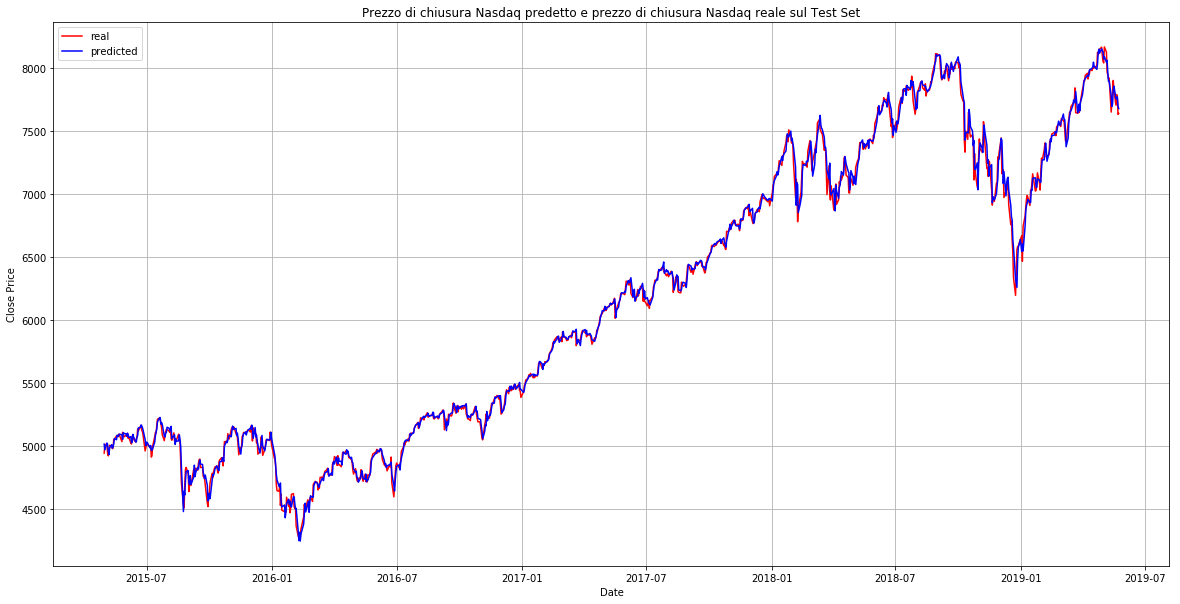

In [440]:
fig = plt.figure(figsize=(20.0, 10.0))
ax = fig.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
plot1, = plt.plot(x_test.index, y_reg_test, c='red')
plot2, = plt.plot(x_test.index, gs_svr_reg.predict(x_test), c="blue")
ax.legend([plot1, plot2], ["real", "predicted"])
plt.grid()
plt.title("Prezzo di chiusura Nasdaq predetto e prezzo di chiusura Nasdaq reale sul Test Set")
plt.savefig('static/close-nasdaq-compare.png', bbox_inches='tight')

- Possiamo rappresentare l'andamento delle variazioni Close-Open calcolato dalla __Close__ predetta e l'andamento calcolato dalla Close reale (sempre sul __Test Set__).

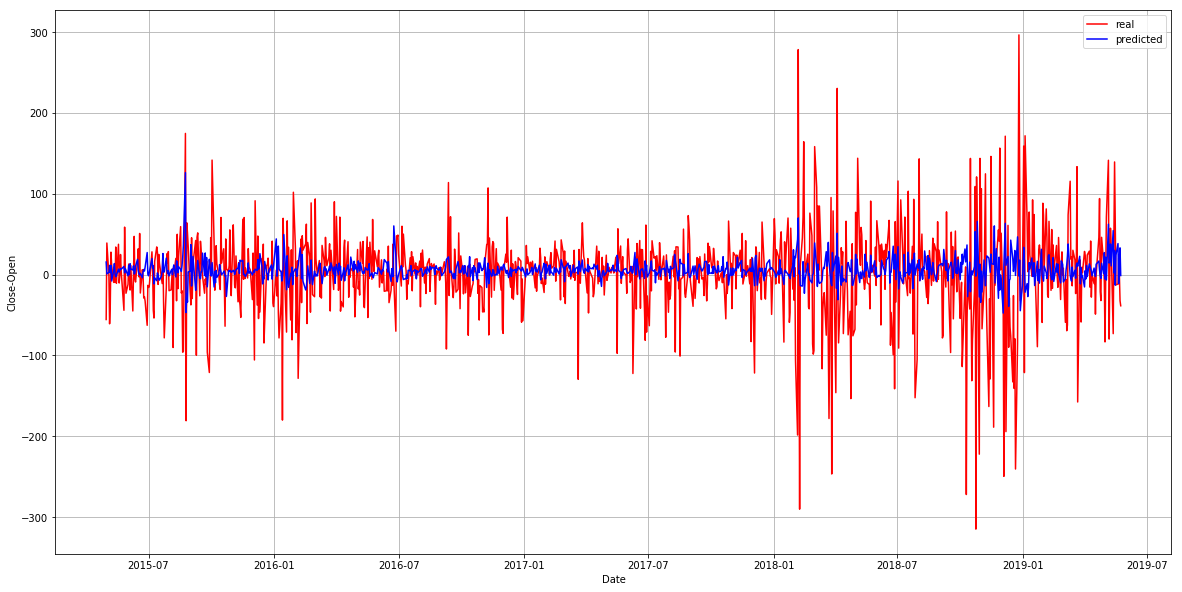

In [358]:
fig = plt.figure(figsize=(20.0, 10.0))
ax = fig.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Close-Open")
plot1, = plt.plot(x_test.index, y_reg_test - x_test["Open"], c='red')
plot2, = plt.plot(x_test.index, gs_svr_reg.predict(x_test) - x_test["Open"], c="blue")
ax.legend([plot1, plot2], ["real", "predicted"])
plt.grid()

# Classificazione DJIA

- Il __DJIA (_Dow Jones Industrial Average_)__ è il più noto indice azionario della borsa di New York. L'indice è calcolato, a differenza di altri indici che tengono conto della capitalizzazione (e quindi del peso relativo delle varie società), soppesando il prezzo dei principali 30 titoli di Wall Street.
- Consideriamo questo indice, in quanto possiede diversi titoli in comune con il __NASDAQ__ esaminato precedentemente.
    - Ad esempio: Microsoft, Apple, Cisco, Intel ecc...
- Ora proviamo ad addestrare il miglior modello di classificazione ottenuto su il __DJIA__. 

- Per prima cosa otteniamo i dati da __Yahoo Finance__.

In [359]:
djia = yf.download("^DJI", start="1999-01-01", end="2019-05-27")

[*********************100%***********************]  1 of 1 downloaded


- Visualizziamo l'andamento di apertura dei due indici, che presumibilmente, avendo titoli in comune, devono avere un andamento simile

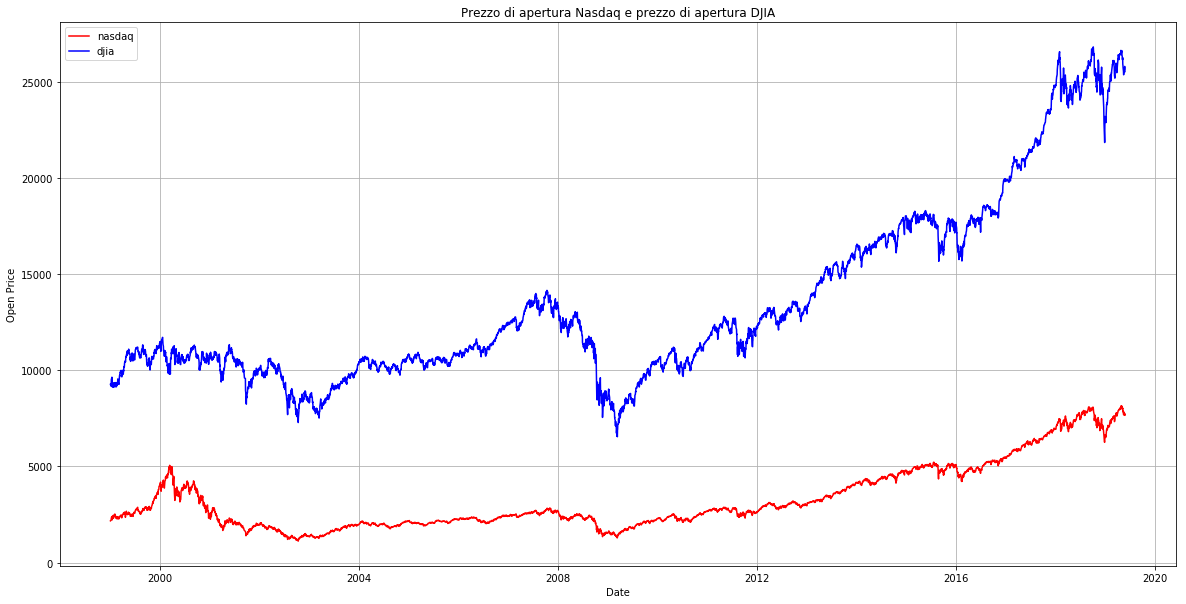

In [441]:
fig = plt.figure(figsize=(20.0, 10.0))
ax = fig.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Open Price")
plot1, = plt.plot(nasdaq.index, nasdaq["Open"], c='red')
plot2, = plt.plot(djia.index, djia["Open"], c="blue")
ax.legend([plot1, plot2], ["nasdaq", "djia"])
plt.grid()
plt.title("Prezzo di apertura Nasdaq e prezzo di apertura DJIA")
plt.savefig('static/compare.png', bbox_inches='tight')

- Ora prepariamo i dati come fatto per lo studio degli indici del Nasdaq.

In [361]:
djia["ROI"] = 100*(djia["Close"] - djia["Open"]) / djia["Open"] # Guadagno percentuale.

- Creazione delle __features__ aggiuntive.

In [362]:
for i in range(1, 6):
    djia["ROILag{}".format(i)] = djia["ROI"].shift(i)

In [363]:
djia["VolumeLag1"] = djia["Volume"].shift(1)

In [364]:
for i in range(1, 6):
    djia["OpenLag{}".format(i)] = djia["Open"].shift(i)

In [365]:
for i in range(1, 6):
    djia["CloseLag{}".format(i)] = djia["Close"].shift(i)

In [366]:
for i in range(1, 6):
    djia["HighLag{}".format(i)] = djia["High"].shift(i)

In [367]:
for i in range(1, 6):
    djia["LowLag{}".format(i)] = djia["Low"].shift(i)

In [368]:
djia.columns == nasdaq.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [369]:
djia.describe()

,Open,High,Low,Close,Adj Close,Volume,ROI,ROILag1,ROILag2,ROILag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5.132000e+03,5132.000000,5131.000000,5130.000000,5129.000000,...,5131.000000,5130.000000,5129.000000,5128.000000,5127.000000,5131.000000,5130.000000,5129.000000,5128.000000,5127.000000
mean,13480.276198,13559.792668,13398.098055,13483.245427,13483.245427,2.116913e+08,0.028089,0.028068,0.028201,0.028238,...,13557.432306,13555.073522,13552.670883,13550.263395,13547.883554,13395.740210,13393.414216,13391.004059,13388.588184,13386.214094
std,4677.356002,4685.174913,4668.137153,4678.019999,4678.019999,1.010507e+08,1.106776,1.106883,1.106950,1.107055,...,4682.578921,4679.985753,4677.276789,4674.553635,4671.901723,4665.534885,4663.013437,4660.271372,4657.512672,4654.862782
min,6547.010000,6709.610000,6469.950000,6547.050000,6547.050000,8.410000e+06,-7.783348,-7.783348,-7.783348,-7.783348,...,6709.610000,6709.610000,6709.610000,6709.610000,6709.610000,6469.950000,6469.950000,6469.950000,6469.950000,6469.950000
25%,10378.590000,10439.887500,10302.972500,10380.430000,10380.430000,1.302825e+08,-0.450716,-0.450832,-0.450374,-0.450601,...,10439.725000,10439.562500,10439.400000,10439.377500,10439.355000,10302.945000,10302.917500,10302.890000,10302.745000,10302.600000
50%,11459.880000,11537.425000,11382.480000,11468.310000,11468.310000,2.068800e+08,0.053041,0.052961,0.053041,0.053121,...,11533.070000,11532.775000,11532.480000,11532.475000,11532.470000,11382.210000,11382.070000,11381.930000,11381.850000,11381.770000
75%,16329.852500,16423.935000,16218.510000,16330.615000,16330.615000,2.682625e+08,0.532050,0.532107,0.532164,0.532221,...,16422.505000,16421.087500,16420.210000,16419.670000,16417.175000,16216.770000,16214.690000,16212.080000,16212.005000,16208.525000
max,26833.470000,26951.810000,26789.080000,26828.390000,26828.390000,9.005100e+08,10.932925,10.932925,10.932925,10.932925,...,26951.810000,26951.810000,26951.810000,26951.810000,26951.810000,26789.080000,26789.080000,26789.080000,26789.080000,26789.080000


- Utilizziamo le features dell'analisi precedente.

In [370]:
X_djia = djia[features].copy()

In [371]:
X_djia.dropna(inplace=True)

In [372]:
X_djia.head(5)

,Open,VolumeLag1,ROILag1,ROILag2,ROILag3,ROILag4,ROILag5,OpenLag1,OpenLag2,OpenLag3,...,HighLag1,HighLag2,HighLag3,HighLag4,HighLag5,LowLag1,LowLag2,LowLag3,LowLag4,LowLag5
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-08,9538.28,88290000.0,-0.045902,2.464194,1.376299,0.002831,-0.999448,9542.14,9315.42,9184.78,...,9542.14,9562.22,9338.74,9350.33,9287.77,9426.02,9315.42,9182.98,9122.47,9181.43
1999-01-11,9643.32,103250000.0,1.101247,-0.045902,2.464194,1.376299,0.002831,9538.28,9542.14,9315.42,...,9647.96,9542.14,9562.22,9338.74,9350.33,9525.41,9426.02,9315.42,9182.98,9122.47
1999-01-12,9618.86,98720000.0,-0.242966,1.101247,-0.045902,2.464194,1.376299,9643.32,9538.28,9542.14,...,9643.32,9647.96,9542.14,9562.22,9338.74,9532.61,9525.41,9426.02,9315.42,9182.98
1999-01-13,9471.34,95680000.0,-1.498930,-0.242966,1.101247,-0.045902,2.464194,9618.86,9643.32,9538.28,...,9620.15,9643.32,9647.96,9542.14,9562.22,9451.77,9532.61,9525.41,9426.02,9315.42
1999-01-14,9349.56,109060000.0,-1.285774,-1.498930,-0.242966,1.101247,-0.045902,9471.34,9618.86,9643.32,...,9471.34,9620.15,9643.32,9647.96,9542.14,9213.10,9451.77,9532.61,9525.41,9426.02


In [373]:
y_djia = djia[5:]["ROI"].copy()

In [374]:
y_djia = pd.Series(np.where(y_djia >= 0, "Up", "Down"), index=y_djia.index)

## Divisione Training, Validation, Test Set

In [375]:
test_perc_djia = X_djia.shape[0] * 20 // 100 # // --> divisione intera.
test_perc_djia

1025

In [376]:
x_test_djia = X_djia.tail(test_perc_djia).copy()
y_test_djia = y_djia.tail(test_perc_djia).copy()

In [377]:
train_perc_djia = X_djia.shape[0] * 60 // 100
train_perc_djia

3076

In [378]:
validation_perc_djia = (X_djia.shape[0] - train_perc_djia - test_perc_djia)
validation_perc_djia

1026

In [379]:
test_perc_djia + train_perc_djia + validation_perc_djia == X_djia.shape[0] == y_djia.shape[0]

True

In [380]:
x_train_djia = X_djia[0:train_perc_djia]
y_train_djia = y_djia[0:train_perc_djia]

In [381]:
x_val_djia = X_djia[train_perc_djia:train_perc_djia+validation_perc_djia]
y_val_djia = y_djia[train_perc_djia:train_perc_djia+validation_perc_djia]

- Plottiamo le distribuzioni di __Up__ e __Down__ nei tre insiemi.

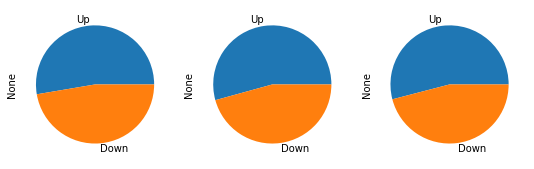

In [382]:
plt.figure(figsize=(9, 6))
y_train_djia.value_counts().plot.pie(ax=plt.subplot(1, 3, 1))
y_val_djia.value_counts().plot.pie(ax=plt.subplot(1, 3, 2))
y_test_djia.value_counts().plot.pie(ax=plt.subplot(1, 3, 3))

## Preparazione dati per addestramento del modello

In [383]:
x_for_grid_search_djia = X_djia[0:train_perc_djia + validation_perc_djia]

In [384]:
y_for_grid_search_djia = y_djia.reindex_like(x_for_grid_search_djia)

- Ora fittiamo il modello migliore di classificazione sul nuovo DataSet.

In [385]:
from sklearn.base import clone
ensemble_djia = clone(ensemble) # Clone del modello precedente.

In [386]:
ensemble_djia.fit(x_for_grid_search_djia, y_for_grid_search_djia)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('svc', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random... subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

- Ora testiamo tale modello sul __Test Set__ per ricaverne il __ROI__.

In [387]:
model_stat(x_test_djia, y_test_djia, ensemble_djia)

Accuratezza:  0.5365853658536586
ROI:  0.14798749544233128
Guadagno:  908.7799999999943
F1:  0.418435200989989


- In questo caso il modello che forniva il __ROI__ maggiore sul DataSet del __Nasdaq__ è stato addestrato sul DataSet __DJIA__ e porta ad un __ROI__ del ~15%.
- Il __ROI__ misurato risulta più basso ripetto a quello sul DataSet precedente, questo potrebbe essere dovuto alle maggiori oscillazioni nell'andamento del mercato.

## Applichiamo il modello di  Regressione sul DJIA

- Proviamo ad applicare il modello di regressione sul DJIA. 

In [388]:
y_reg_train_djia = djia["Close"].reindex_like(x_train_djia)

y_reg_train_djia.index == x_train_djia.index # Test.

y_reg_val_djia = djia["Close"].reindex_like(x_val_djia)

y_reg_val_djia.index == x_val_djia.index # Test.

y_reg_test_djia = djia["Close"].reindex_like(x_test_djia)

y_reg_test_djia.index == x_test_djia.index # Test.

array([ True,  True,  True, ...,  True,  True,  True])

In [389]:
y_reg_for_grid_search_djia = djia["Close"].reindex_like(x_for_grid_search_djia)

y_reg_for_grid_search_djia.index == x_for_grid_search_djia.index # Test

array([ True,  True,  True, ...,  True,  True,  True])

In [390]:
gs_svr_reg_djia = GridSearchCV(model_svr, param_grid=grid_svr, cv=split, scoring=mse_scorer)
gs_svr_reg_djia.fit(x_for_grid_search_djia, y_reg_for_grid_search_djia)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'svr__C': [0.1, 1, 10, 100, 1000], 'svr__kernel': ['poly'], 'svr__degree': range(1, 5), 'svr__epsilon': [0.1, 0.2, 0.5, 0.8, 1.0]}, {'svr__C': [0.1, 1, 10, 100, 1000], 'svr__kernel': ['rbf'], 'svr__gamma': ['auto', 'scale'], 'svr__epsilon': [0.1, 0.2, 0.5, 0.8, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [391]:
pd.DataFrame(gs_svr_reg_djia.cv_results_).sort_values("rank_test_score").head(5)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__degree,param_svr__epsilon,param_svr__kernel,param_svr__gamma,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
83,0.753792,0.0,0.076048,0.0,1000,1,0.8,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-15235.468427,-15235.468427,0.0,1,-15292.573511,-15292.573511,0.0
82,0.763508,0.0,0.075007,0.0,1000,1,0.5,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-15238.130500,-15238.130500,0.0,2,-15292.713848,-15292.713848,0.0
84,0.809218,0.0,0.074972,0.0,1000,1,1,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-15239.780229,-15239.780229,0.0,3,-15292.941239,-15292.941239,0.0
80,0.847634,0.0,0.078342,0.0,1000,1,0.1,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-15243.519311,-15243.519311,0.0,4,-15292.358185,-15292.358185,0.0
81,0.864591,0.0,0.078809,0.0,1000,1,0.2,poly,NaN,"{'svr__C': 1000, 'svr__degree': 1, 'svr__epsil...",-15245.957658,-15245.957658,0.0,5,-15293.571095,-15293.571095,0.0


In [392]:
reg_stats(x_test_djia, y_reg_test_djia, gs_svr_reg_djia.best_estimator_)

   Mean squared error: 3.7954e+04
       Relative error: 0.62249%
R-squared coefficient: 0.99669


In [393]:
math.sqrt(3.7954e+04)

194.81786365731455

- Abbiamo effettuato la grid search che ci ha portato ai risultati migliori sul __nasdaq__ anche sull'indice __djia__. Abbiamo ottenuto un __RMSE__ di circa  195 dollari.

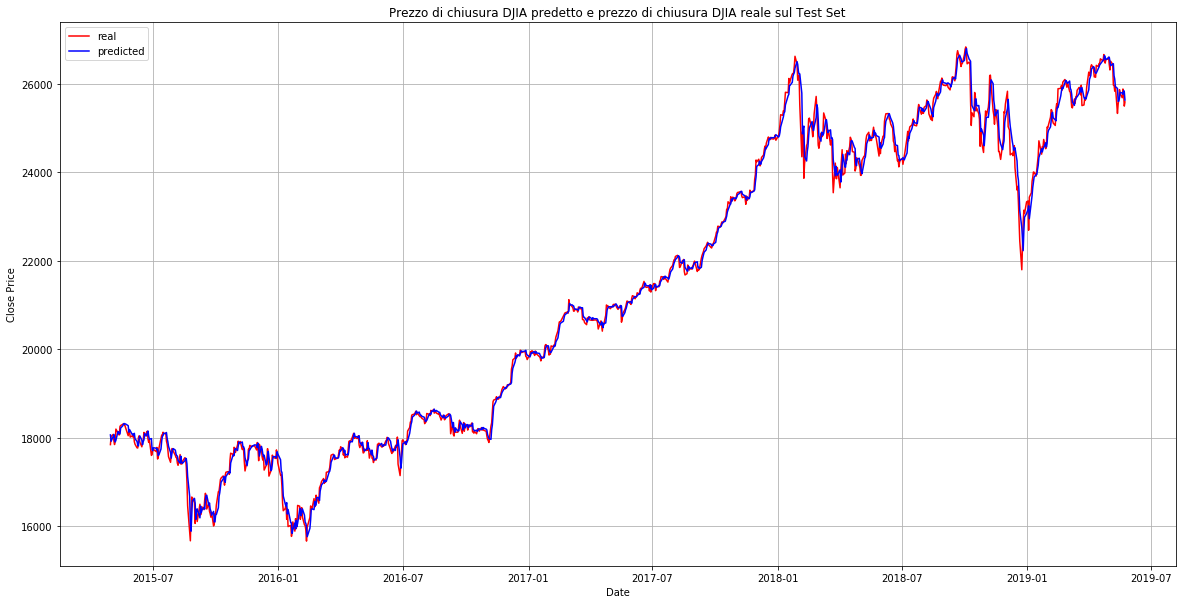

In [442]:
fig = plt.figure(figsize=(20.0, 10.0))
ax = fig.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
plot1, = plt.plot(x_test_djia.index, y_reg_test_djia, c='red')
plot2, = plt.plot(x_test_djia.index, gs_svr_reg_djia.predict(x_test_djia), c="blue")
ax.legend([plot1, plot2], ["real", "predicted"])
plt.grid()
plt.title("Prezzo di chiusura DJIA predetto e prezzo di chiusura DJIA reale sul Test Set")
plt.savefig('static/close-djia-compare.png', bbox_inches='tight')

# Conslusioni Finali

- Il __modello di classificazione__ da noi realizzato consente di fornire consigli sulle azioni di __trading__ da effettuare. Il miglior modello ottenuto (quello di __ensemble__) consente di ottenere un __ROI__ del __31%__, con una confidenza del 95% che l'accuratezza su dati ignoti cadrà nell'intervallo [0.52, 0,58].

- Infine abbiamo voluto realizzare anche un semplice __modello di regressione__ per provare a predire il prezzo di chiusura del mercato. Il risultato migliore è stato raggiunto con un modello basato sulle __SVM__, con __MSE__ di circa __57__ dollari sul __Test Set__. 

- Abbiamo deciso di realizzare entrambi i modelli in quanto il loro utilizzo combinato potrebbe tornare utile per eseguire azioni di trading in maniera sicura.
    - __Ad esempio__: se il modello di classificazione all'inizio di una giornata predice __Up__ e quello di regressione ci predice una Close = Open + epsilon, con epsilon valore piccolo, allora considerando anche eventuali costi aggiuntivi (ad esempio quelli di transazione) non conviene eseguire azioni di trading. Invece, se il modello di classificazione predice __Up__ e quello di regressone ci predice una Close = Open + Delta, con delta abbastanza grande, allora il __trader__ potrà investire con maggior sicurezza.

- Infine testiamo il modello addestrato sul DataSet __Nasdaq__ per calcolare il __ROI__ sul TestSet __DJIA__.

In [394]:
model_stat(x_test_djia, y_test_djia, ensemble)

Accuratezza:  0.5404878048780488
ROI:  0.16471787604241622
Guadagno:  1011.5199999999941
F1:  0.35085497150094996


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Eseguiamo anche l'operazione contraria, ossia testiamo il modello addestrato sul DataSet __DJIA__ per calcolare il __ROI__ sul TestSet __Nasdaq__. 

In [395]:
model_stat(x_test, y_test, ensemble_djia)

Accuratezza:  0.5346341463414634
ROI:  0.24878991124011854
Guadagno:  1527.7999999999984
F1:  0.4763356293129948


- Dall'esempio sopra riportato risulta che il modello addestrato sul DataSet __DJIA__ porta ad un __ROI__ maggiore sul __test set__ del DataSet __Nasdaq__ rispetto al proprio __test set__ , questo potrebbe essere dovuto al fatto che il mercato __Nasdaq__ è più stabile e quindi più facilmente prevedibile.
- L'errore è più alto del precedente, questo è dovuto al fatto che nel __DJIA__ i prezzi dei titoli sono molto più alti.

# Scrittura modelli su file

- Scriviamo i modelli su file i modelli di predizione ottenuti per integrarli nella Web App.

In [414]:
import pickle
with open("instance/model_classification_nasdaq.bin", "wb") as f:
    pickle.dump(ensemble, f)

In [415]:
with open("instance/model_regression_nasdaq.bin", "wb") as f:
    pickle.dump(gs_svr_reg.best_estimator_, f)

In [416]:
with open("instance/model_classification_djia.bin", "wb") as f:
    pickle.dump(ensemble_djia, f)

In [417]:
with open("instance/model_regression_djia.bin", "wb") as f:
    pickle.dump(gs_svr_reg_djia.best_estimator_, f)

In [420]:
import csv
with open('instance/model_stat.csv', mode='w') as f:
    employee_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(["title", "roi", "rmse", "acc"])
    employee_writer.writerow(["nasdaq", roi(y_test, ensemble.predict(x_test)), math.sqrt(mean_squared_error(gs_svr_reg.best_estimator_.predict(x_test), y_reg_test)), ensemble.score(x_test, y_test)])
    employee_writer.writerow(["djia", roi(y_test_djia, ensemble_djia.predict(x_test_djia)), math.sqrt(mean_squared_error(gs_svr_reg_djia.best_estimator_.predict(x_test_djia), y_reg_test_djia)), ensemble_djia.score(x_test_djia, y_test_djia)])  